# Data Science In Practice 
### Ravi Gollapalli
The objective of this task was construct different time series representations for 3 countries based on the supplied mobility data. We had to analyse and compare the resulting series.
> - For this particular assignment, I decided to take a look at the United States, the United Kingdom and Australia.
<img src="map.jpg" alt="map" style="width: 500px;"/>
> - I chose to do this because of the geographical distance between the countries and my analysis will also look at this as a factor to be considered.  
> - This dataset contains 6 locations: Retail & Recreation, Grocery & Pharmacy, Parks, Transit Stations, Workplaces, and Residential areas for all three countries.
> - The dates for these datasets range between the 1st of March 2020 to the 31st of October 2020.

In [123]:
#importing necessary libraries
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Functions for all tasks

In [124]:
#created a function which reads the downloaded CSV and puts it into a dataframe
def readFile(name):
    df = pd.read_csv(name)
    return df

In [125]:
#created a function to format the data as required
def formatData(country):
    #converting date to datetime
    country['dates'] = pd.to_datetime(country['date'])
    country = country.set_index('dates')
    #dropping unnecessary columns
    country.drop(['date', 'id'], axis=1, inplace=True)
    #renaming the colums
    country.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation', 
                            'grocery_and_pharmacy_percent_change_from_baseline' : 'grocery_and_pharmacy',
                             'parks_percent_change_from_baseline' : 'parks',
                             'transit_stations_percent_change_from_baseline' : 'transit_stations',
                            'workplaces_percent_change_from_baseline' : 'workplaces',
                             'residential_percent_change_from_baseline' : 'residential'}, inplace = True)
    return country

In [126]:
#created a function to plot data for any location in any country
def plotData(country, location):
    daily = country[location]
    weekly = daily.rolling(7).mean()
    fortnightly = daily.rolling(14).mean()
    a = daily.plot(figsize=(10, 5), linewidth=0.5)
    b = weekly.plot(figsize=(10, 5))
    c = fortnightly.plot(figsize=(10, 5))
    a.legend(labels=['Raw Data','7 Days','14 Days'])
    plt.title(location, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("% Change from Baseline", fontsize=12)

In [127]:
#created a function to get the mean of the row or column depending on what is specified for the axis
def average(country1, country2, country3, ax):
    #putting each country to a data frame
    av1 = country1.mean(axis = ax).to_frame()
    av2 = country2.mean(axis = ax).to_frame()
    av3 = country3.mean(axis = ax).to_frame()
    #merging frames
    a = pd.merge(av1, av2, left_index=True, right_index=True, how='outer')
    a = pd.merge(a, av3, left_index=True, right_index=True, how='outer')
    #renaming columns
    a.rename(columns = {"0_x" : "Australia", "0_y" : "USA", 0 : "UK"}, inplace = True)
    return a

In [128]:
#creating a function for analysing by dates. Resampling by week here
def plotByDate(Date1, Date2):
    #in the case that the last date is the most current date
    if Date2 == " ":
        av = a[Date1:].resample("W").mean()
        av.plot(figsize=(16, 5)),
        plt.title('Observing % Change over the period ' + Date1 + " to Latest Result", fontsize = 14)
  
    #in the case that the first date is the start date
    elif Date1 == " ":
        av = a[:Date2].resample("W").mean()    
        av.plot(figsize=(16, 5))
        plt.title('Observing % Change over the period from Start to ' + Date2, fontsize = 14)
    
    #in the case that both dates need to be specified
    else:               
        av = a[Date1:Date2].resample("W").mean()
        av.plot(figsize=(16, 5))
        plt.title('Observing % Change over the period ' + Date1 + " to " + Date2, fontsize = 14)
    
    plt.xlabel("Date",fontsize=13)
    plt.ylabel("%Change",fontsize=13);
     

In [129]:
#function to plot all 3 country's data. Resampled for a week. 
def plotCountryData(location):
    c = aus[location].resample("W").mean()
    a = c.plot(figsize=(10, 5))
    c1 = usa[location].resample("W").mean()
    a1 = c1.plot(figsize=(10, 5))
    c2 = uk[location].resample("W").mean()
    a2 = c2.plot(figsize=(10, 5))
    a.legend(labels=['Australia','USA','UK'])
    plt.title(location, fontsize=14)
    plt.xlabel("Month", fontsize=13)
    plt.ylabel("% Change from Baseline", fontsize=13)

## Data Collection for Tasks

In [130]:
#using the function to read files
aus = readFile("australia.csv")
usa = readFile("united_states.csv")
uk = readFile("united_kingdom.csv")

## Task 1: Within-country Analysis

### Data Preparation 


In [131]:
aus.head()

id    country        date  \
0  136397  Australia  2020-03-01   
1  136398  Australia  2020-03-02   
2  136399  Australia  2020-03-03   
3  136400  Australia  2020-03-04   
4  136401  Australia  2020-03-05   

   retail_and_recreation_percent_change_from_baseline  \
0                                                4.0    
1                                                0.0    
2                                               -2.0    
3                                                0.0    
4                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                7.0   
1                                                5.0   
2                                                7.0   
3                                               12.0   
4                                                9.0   

   parks_percent_change_from_baseline  \
0                                20.0   
1                                -1.0   
2                               -14.0   
3                               -15.0   
4                               -19.0   

   transit_stations_percent_change_from_baseline  \
0                                            6.0   
1                                            6.0   
2                                            9.0   
3                                            7.0   
4                                            6.0   

   workplaces_percent_change_from_baseline  \
0                                     -1.0   
1                                     10.0   
2                                     15.0   
3                                     14.0   
4                                     13.0   

   residential_percent_change_from_baseline  
0                                       0.0  
1                                       0.0  
2                                      -1.0  
3                                      -1.0  
4                                       0.0

Based on this dataframe I took to inspect, it's clear that I must format the data. I need to do the following:
> - Convert date to datetime format
> - Drop unnecessary columns like ID, and Date once it has been formatted. 
> - Rename the columns to make it easier to work with

----

## Country 1: Australia

**Part a) Construct  a  set  of  time  series  that  represent  the  mobility  patterns  for  the different location categories for the country**

To complete this, I must first use my function to format the data in order to create table that contains my set of time series data. I will then create an overall visualisation containing all of the locations in this country.


In [132]:
#using the fucntion to format data for Australia
aus = formatData(aus)

In [133]:
#checking to see I don't have any strings for the numbers
aus.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [134]:
#making sure I have no null columns
aus.isnull().sum()

country                  0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

In [135]:
aus.head()

country  retail_and_recreation  grocery_and_pharmacy  parks  \
dates                                                                       
2020-03-01  Australia                    4.0                   7.0   20.0   
2020-03-02  Australia                    0.0                   5.0   -1.0   
2020-03-03  Australia                   -2.0                   7.0  -14.0   
2020-03-04  Australia                    0.0                  12.0  -15.0   
2020-03-05  Australia                   -2.0                   9.0  -19.0   

            transit_stations  workplaces  residential  
dates                                                  
2020-03-01               6.0        -1.0          0.0  
2020-03-02               6.0        10.0          0.0  
2020-03-03               9.0        15.0         -1.0  
2020-03-04               7.0        14.0         -1.0  
2020-03-05               6.0        13.0          0.0

This is my time series dataset for Australia. The Date is set as the index and the values represent percentage change.

Text(0, 0.5, '% Change from Baseline')

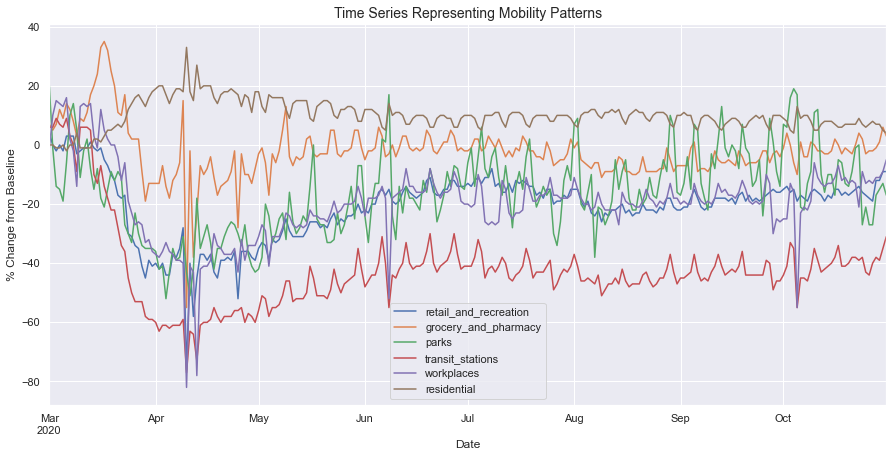

In [136]:
#setting seaborn
sns.set()
#plotting the graph
a = aus.plot(figsize=(15, 7))
plt.title("Time Series Representing Mobility Patterns", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Change from Baseline", fontsize=12)

> - The plot that is visualised here displays all the different locations over time. 
> - We can see that there are a few potential outliers in retail & recreation, grocery & pharmacy, workplaces and parks. We will look into these in more detail later. 
> - It's quite difficult to analyse further with this graph, so we will further characterise and visualise this time series to gain some insights

---------------------------------------------------------------------------------------------------------------------

**Part b) Characterise  and  visualise  each  of  these  time  series**

I will perform a visual inspection of the time series, compute summary statistics and talk about some general trends in the series.

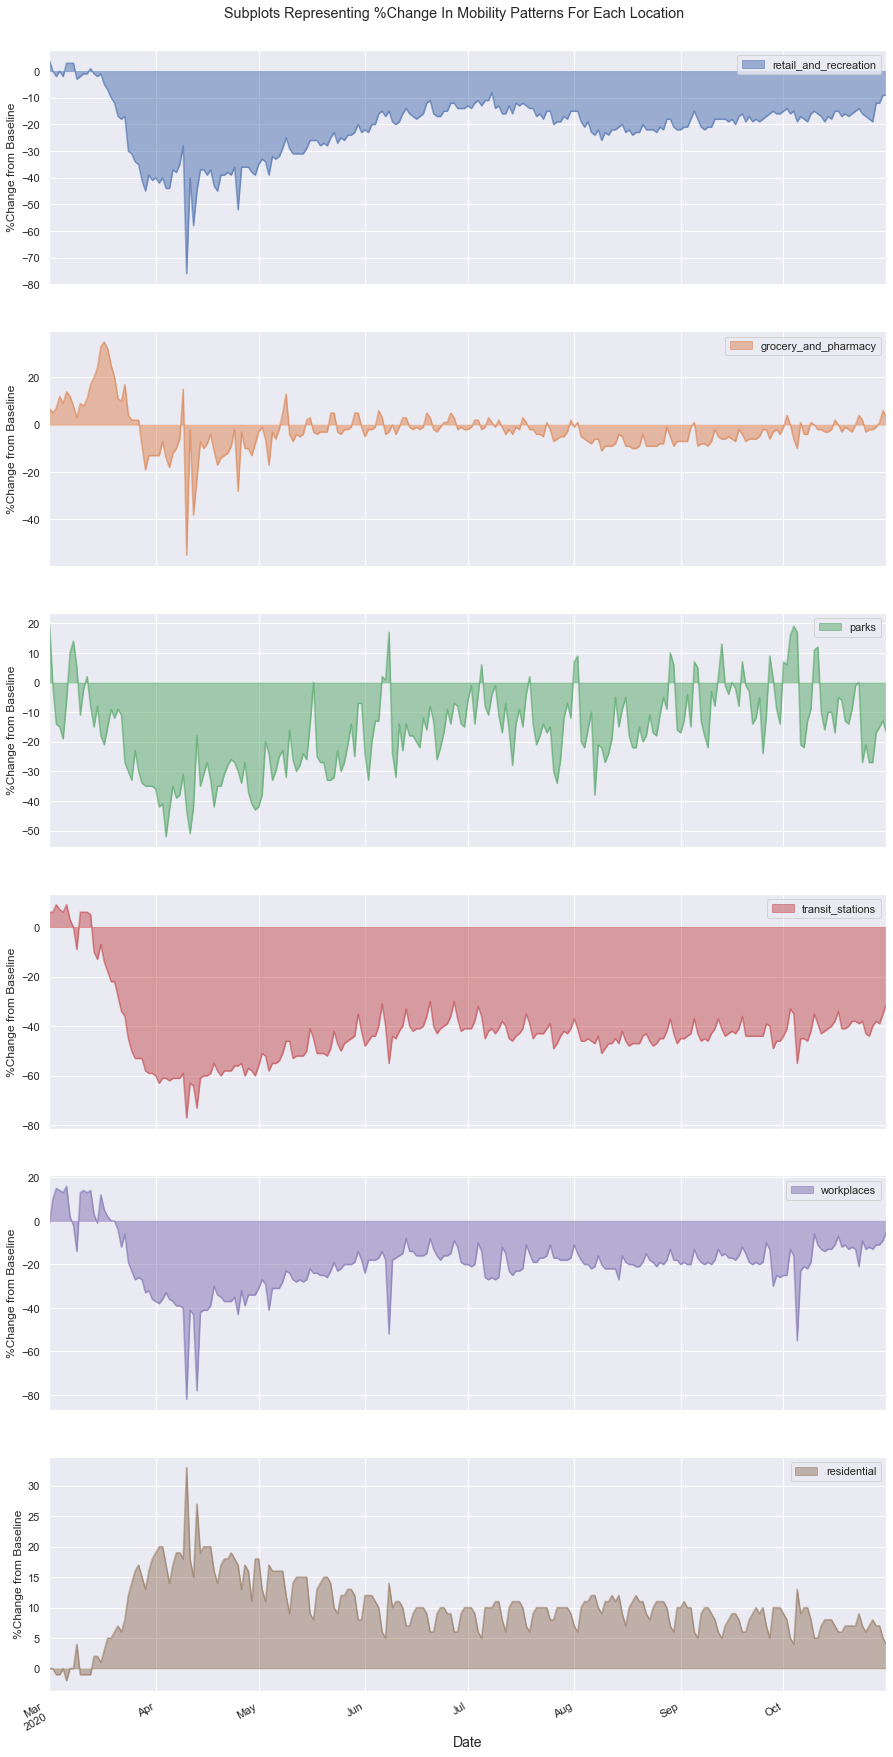

In [137]:
#creating subplots for each location
a1 = aus.plot.area(subplots = True, figsize=(15, 30), stacked = False, title ="Subplots Representing %Change In Mobility Patterns For Each Location")
plt.xlabel("Date", fontsize=14)
#formatting the title
plt.subplots_adjust(top=0.96)
#assigning a y axis to all graphs
for x in a1:
    x.set_ylabel('%Change from Baseline')

I created subplots with the raw data to generate a plot for each individual location:

**Retail and Recreation:** Retail and Recreation locations faced quite a drop in mobility from nearly the beginning of March. Close to halfway through April, we see a change of nearly -80% in mobility for retail and recreation locations, followed by spikes of approximately -60% and -55% soon after.

**Grocery and Pharmacy:** There is an initial increase of close to 30% in March. This is followed by a spike of close to +20% and then a spike of nearly -50% in a matter of days. Overall, this graph remained close to the baseline.

**Parks:** Parks have varied amounts of peaks and troughs throughout the pandemic with the highest point nearly reaching 20% and the lowest nearly hitting -50%.

**Transit Stations:** Transit stations faced a steep decline in mobility from the baseline throughout the pandemic, with the lowest point nearly hitting -80%.

**Workplaces:** Workplaces had an initial increase in mobility until halfway through March when it began it's descent. The lowest point for workplaces was over -80% in April, followed by a downward spike of nearly -60% in October

**Residential:** Residential locations have an upward trend throughout the pandemic. There is a spike of nearly +30% in April.

In [138]:
aus.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -20.938776             -2.351020  -16.093878   
std                11.170453              9.058963   13.938219   
min               -76.000000            -55.000000  -52.000000   
25%               -25.000000             -7.000000  -26.000000   
50%               -18.000000             -3.000000  -15.000000   
75%               -15.000000              1.000000   -8.000000   
max                 4.000000             35.000000   20.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -42.228571  -19.604082    10.028571  
std           14.511047   12.890236     4.916016  
min          -77.000000  -82.000000    -2.000000  
25%          -49.000000  -25.000000     7.000000  
50%          -44.000000  -19.000000    10.000000  
75%          -40.000000  -14.000000    12.000000  
max            9.000000   16.000000    33.000000

The describe() function is very useful to gather statistics from the data. The key pieces of information from this table are as following:

**mean:** The mean for transit stations is the furthest away from the baseline with -42%. This is interesting as it tells us people have been consistently avoiding transit stations. Grocery and Pharmacy locations are closest to the baseline. There hasn't been a huge change in movement evidently. Residential areas are the only location with a positive mean. This means on average, people stayed at home 10% more than usual. 

**Min / Max:** The min and max values give us the peak and troughs of the data. As we can see, groceries & pharmacies, and residential areas had the highest values, whereas transit stations and workplaces had the lowest. 

Looking at the smoothened data, we are able to gain insights into the general trends of the graphs.

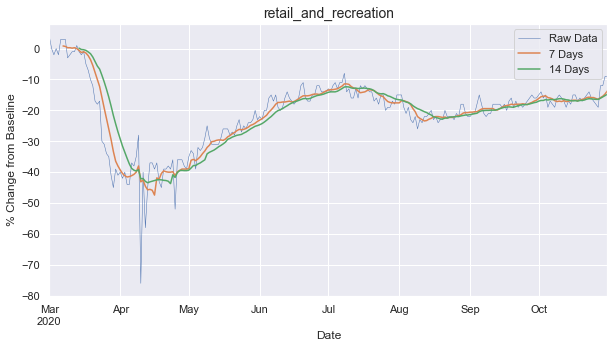

In [139]:
plotData(aus, "retail_and_recreation")

> Retail and recreation areas faced a dip averaging nearly -50% in the middle of April. The mobility in these areas began to increase again at the start of May, continuing till the middle of July. This could indicate a release from lockdown. Since that point, it seems to even off with an average mobility of approximately -20%

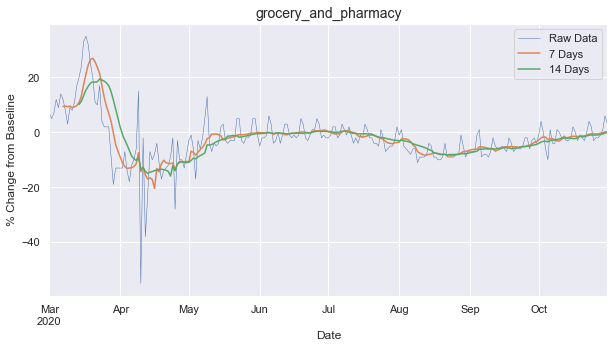

In [140]:
plotData(aus, "grocery_and_pharmacy")

Groceries and Pharmacies have increased in mobility in the beginning of the pandemic followed by a quick descent to around -20%. After this, the mobility levelled off and we see that its quite close to the baseline. Since these fall under the essentials category, it's expected that there wont be much change. 

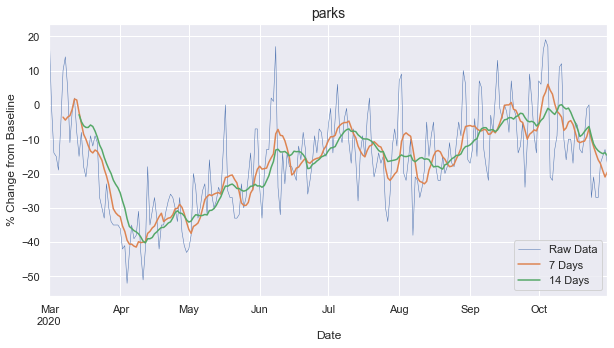

In [141]:
plotData(aus, "parks")

Parks have seen varied mobility. There is a drop once again April bit it rises after that period. It reaches a high point in the end of September / October. This could be due to restrictions being minimal and it's approaching the warmer months of the year in Australia.

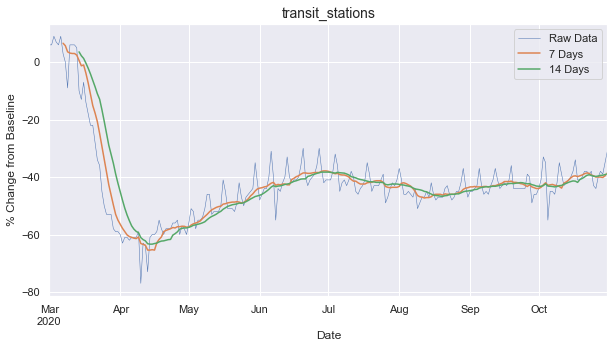

In [142]:
plotData(aus, "transit_stations")

Transit Stations averaged under 40% throughout the pandemic. This suggests there has been minimal travel across the country via public transport. 

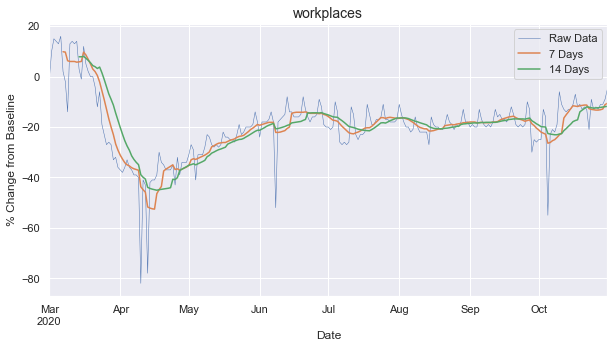

In [143]:
plotData(aus, "workplaces")

The low point for workplaces was in April which is when it is presumed there was a lockdown so this would make sense as many businesses have been forced to close. From about June onwards, the mobility has evened off at around -20%. Towards the end of the graph, we can see a rise in mobility which could possibly suggest businesses are adapting better with the pandemic and are more equipped to operate. 

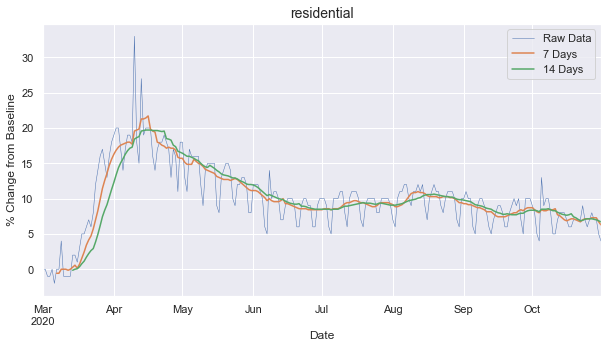

In [144]:
plotData(aus, "residential")

Residential areas have increased in Mobility overall. In the month of April, we can see there was highest mobility in residential areas. On average, the mobility seems to be +10% above the baseline. With more people working from home, this makes sense. 

----

**Part C) Compare  and  contrast  how  the  series  for  the  different  location  categories  have changed  over  time  for  the  country.  To  what  extent  are  these  series  correlated with one another?**

**Part D) Suggest  explanations  for  any  differences  that  you  have  observed  between  the time series for the location categories.**

To complete this, I will firstly graph the time series by month. I will then make a bar chart to see how the monthly average compares with the other locations. Finally, with the use of a correlation heatmap, I will see what locations have the highest and lowest correlation. Each of these will be accompanied with explanations for any differences I observed

Text(0, 0.5, '%Change from Baseline')

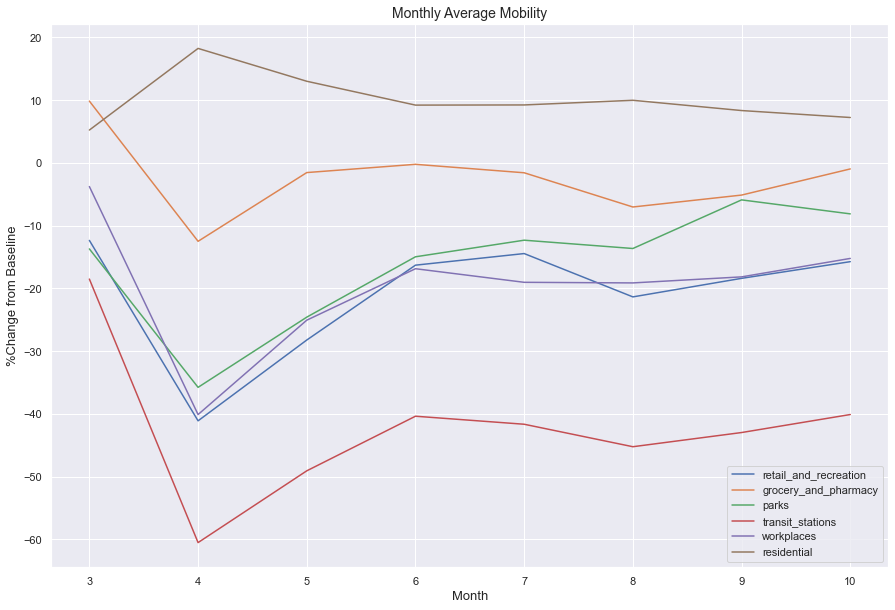

In [145]:
#grouping the mobility by month
aus_month = aus.groupby(aus.index.month).mean()
x = aus_month.plot(figsize=(15,10))
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

As seen before, all the locations have their biggest change in the month of April, after with they seem to stabilise for the rest of the pandemic. Looking at the spikes, it could suggest that Australia went into a lockdown in the middle of April since these are the points where there seems to be the most activity and outliers. 

Text(0, 0.5, '%Change from Baseline')

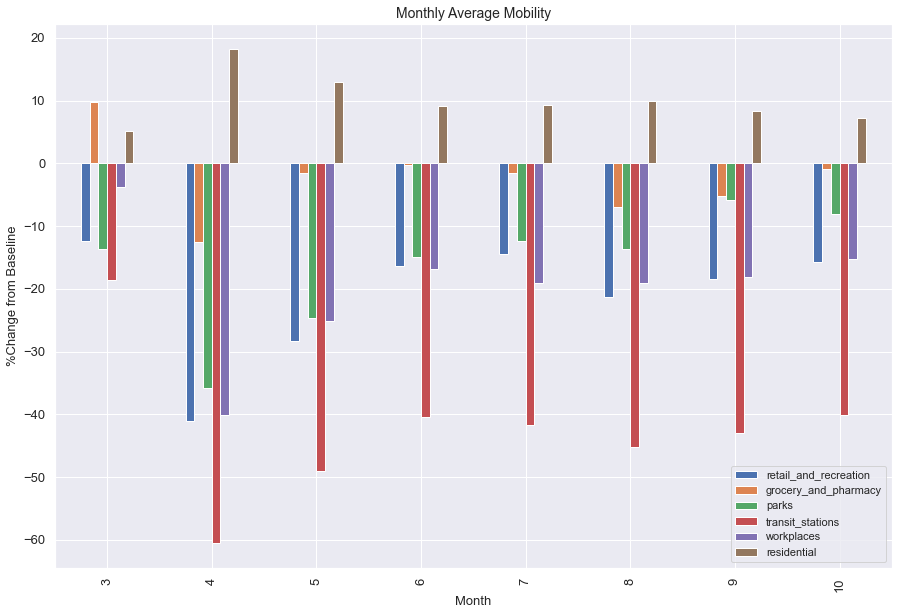

In [146]:
p = aus_month.plot(kind='bar',figsize=(15, 10), fontsize=13, zorder=3)
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

When we plot the monthly figures on a bar chat, it makes it quite clear to see the percentage changes over the months for all locations:

> In March, groceries & pharmacies and residential areas were the only locations above the baseline. This makes sense because there was a lot of panic buying at the beginning of the pandemic and people were being asked to stay at home. 

> In April, we see that workpkaces and retail & recreational areas overtake parks, which was not the case in March. Transit Stations face the biggest drop. 

> In May, workplaces and parks have a very similar change in baseline of about -25%. 

> In June, we see that groceries & pharmacies have nearly returned to the baseline. No other location has managed to do this. 

> In July, we notice an overall increase in transit stations compared to the beginning, and an overall decrease in mobility in residential areas, suggesting people might be using public transport more.

> In August, we observe a decrease in mobility in groceries & pharmacies, as well as transit stations. This could point to another increase in cases, and the reason the residential areas are not as high as the first lockdown could be due to lighter restrictions for work, or more businesses staying open

> In September, we can see that workplaces have a similar change in mobility to retail and recreational areas. This could suggest that the workplaces that are open are also retail and recreational areas. 

> In October, all of the locations, except parks seem to be getting closer to the baseline compared to the previous month. A reason for this could potentially be that people are getting their lives back to somewhat normalcy, and as a result not have as much time for the parks

Text(0.5, 1.0, 'Heatmap of Locations')

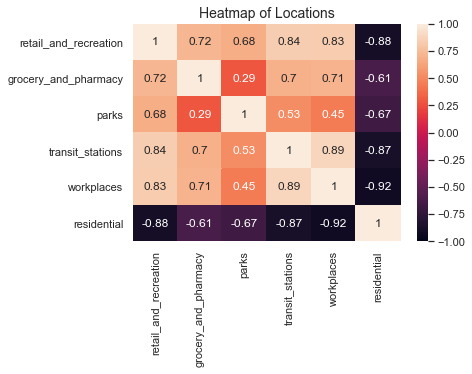

In [147]:
#correlation heat map
heatmap = sns.heatmap(aus.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Heatmap of Locations", fontsize = 14)

I created a heatmap which displays the correlation between different locations. Any correlation that equals to 1 is comparing itself, so we will look for the next closest number. 

- Highest Correlation is between Transit Stations and Workplaces.
- Lowest Correlation is between Residential areas and Workplaces.

Text(0.5, 1.0, 'Transit Stations vs. Workplaces')

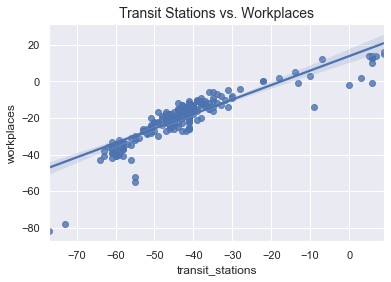

In [148]:
#plotting a regplot
a  = sns.regplot(x="transit_stations", y="workplaces", data=aus);
plt.title("Transit Stations vs. Workplaces", fontsize = 14)

Text(0, 0.5, '% change')

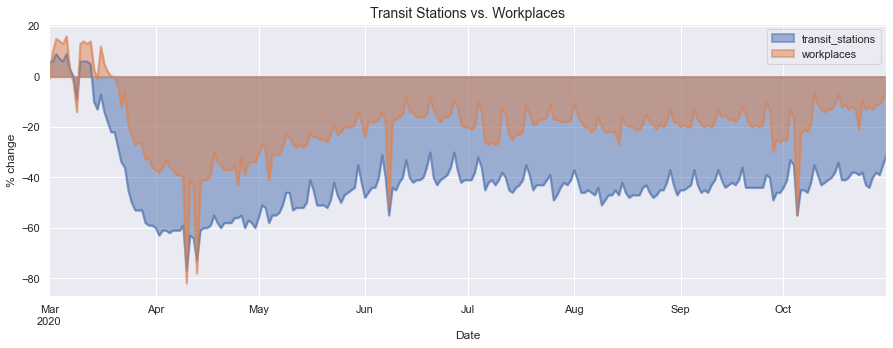

In [149]:
#comparing the graphs of highest correlation
t_w = aus.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["transit_stations","workplaces"])
plt.title("Transit Stations vs. Workplaces", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

As we can see, Transit Stations and Workplaces have a close to directly proportional relationship on the relation plot. As well as this the shape of the two graphs resemble each other, having similar points of peaks and troughs. This makes sense as transit stations could be used to get to workplaces and the decrease in mobility for transit stations also leads to a decrease in mobility for workplaces. 

Text(0.5, 1.0, 'Residential vs. Workplaces')

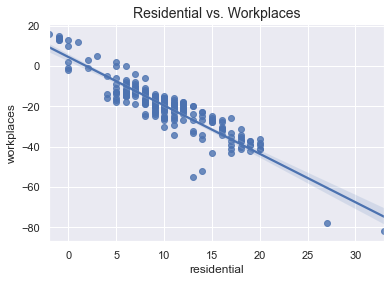

In [150]:
#plotting a regplot
sns.regplot(x="residential", y="workplaces", data=aus);
plt.title("Residential vs. Workplaces", fontsize = 14)

Text(0, 0.5, '% change')

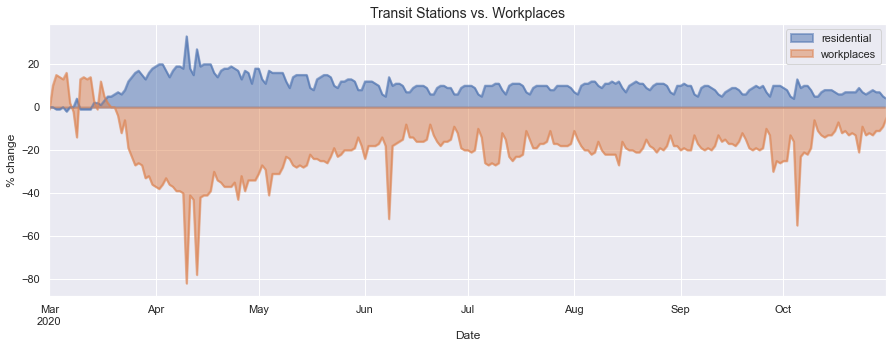

In [151]:
#comparing graphs of lowest correlation
r_w = aus.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["residential","workplaces"])
plt.title("Transit Stations vs. Workplaces", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

Residential areas and workplaces have a close to inverse correlation with each other. The slope of the relation plot displays this. Interestingly, the graph shows no overlap past the middle of March. This inverse correlation makes sense because people are going to workplaces less and staying at home more. 

---------------

**Concluding Remarks for Australia**

**Retail and Recreation:** I expect Retail and Recreation locations have experienced losses throughout the pandemic in Australia. Autumnal season in Australia was severely affected as this was the period of isolation and lockdown. Retail and Recreational locations would be low priority for most citizens and as a result they never managed to get close to the baseline. These locations I assume are heavily correlated with the number of cases in Australia. 

**Grocery and Pharmacy:** In my opinion, groceries and pharmacies will continue to stay a couple of percent under the baseline until we get a vaccine. There may have been speculation and doubt over supply chains and distributors ability to cope at the beginning, but clearly now people have more confidence in them. 

**Parks:** I predict that mobility around parks will return to the baseline soon due to the fact that workplaces are on a rise, so people may not have the time to visit parks. 

**Transit Stations:** Transit stations still having low mobility could be due to restrictions on the number of people allowed on public transport at any one point. Public transport may be operating at half the capacity which could explain the -40% average. This will presumably continue until the vaccines arrive. 

**Workplaces:** Workplaces are expected to rise closer to the baseline in my opinion. General productivity could possibly be improved with people in an office environment and as a result companies may begin phasing people back into workplaces. 

**Residential:** The summer season in Australia is approaching and as a result we may see less people in residential areas and more people on beaches perhaps. With workplaces increasing their mobility too, less people may be in their homes. 

----

## Country 2: United States of America

**Part a) Construct a set of time series that represent the mobility patterns for the different location categories for the country**

To complete this, I must first use my function to format the data in order to create table that contains my set of time series data. I will then create an overall visualisation containing all of the locations in this country.

In [152]:
#using the function to format data for all countries
usa = formatData(usa)

In [153]:
#checking to see I don't have any strings for the numbers
usa.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [154]:
#making sure I have no null columns
usa.isnull().sum()

country                  0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

In [155]:
usa.head()

country  retail_and_recreation  grocery_and_pharmacy  parks  \
dates                                                                           
2020-03-01  United States                   13.0                   9.0   18.0   
2020-03-02  United States                    7.0                   6.0   10.0   
2020-03-03  United States                   11.0                  10.0   20.0   
2020-03-04  United States                    8.0                   6.0   17.0   
2020-03-05  United States                    8.0                   7.0   21.0   

            transit_stations  workplaces  residential  
dates                                                  
2020-03-01               7.0         3.0         -1.0  
2020-03-02               2.0         3.0         -1.0  
2020-03-03               3.0         2.0         -1.0  
2020-03-04               2.0         3.0         -1.0  
2020-03-05               2.0         3.0         -1.0

This is my time series dataset for USA. The Date is set as the index and the values represent percentage change.

Text(0, 0.5, '% Change from Baseline')

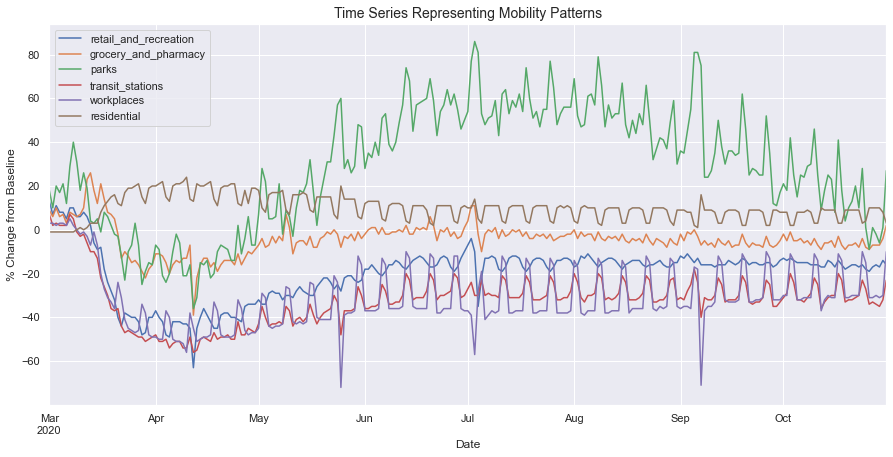

In [156]:
#plotting the graph
u = usa.plot(figsize=(15, 7))
plt.title("Time Series Representing Mobility Patterns", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Change from Baseline", fontsize=12)

> - The plot that is visualised here displays all the different locations over time in USA. 
> - We can see that there are a few potential outliers in workplaces, parks and Grocey & Pharmacies. We will look into these in more detail later. 
> - It's quite difficult to analyse further with this graph, so we will further characterise and visualise this time series to gain some insights

---------------------------------------------------------------------------------------------------------------------

**Part b) Characterise  and  visualise  each  of  these  time  series**

I will perform a visual inspection of the time series, compute summary statistics and talk about some general trends in the series.

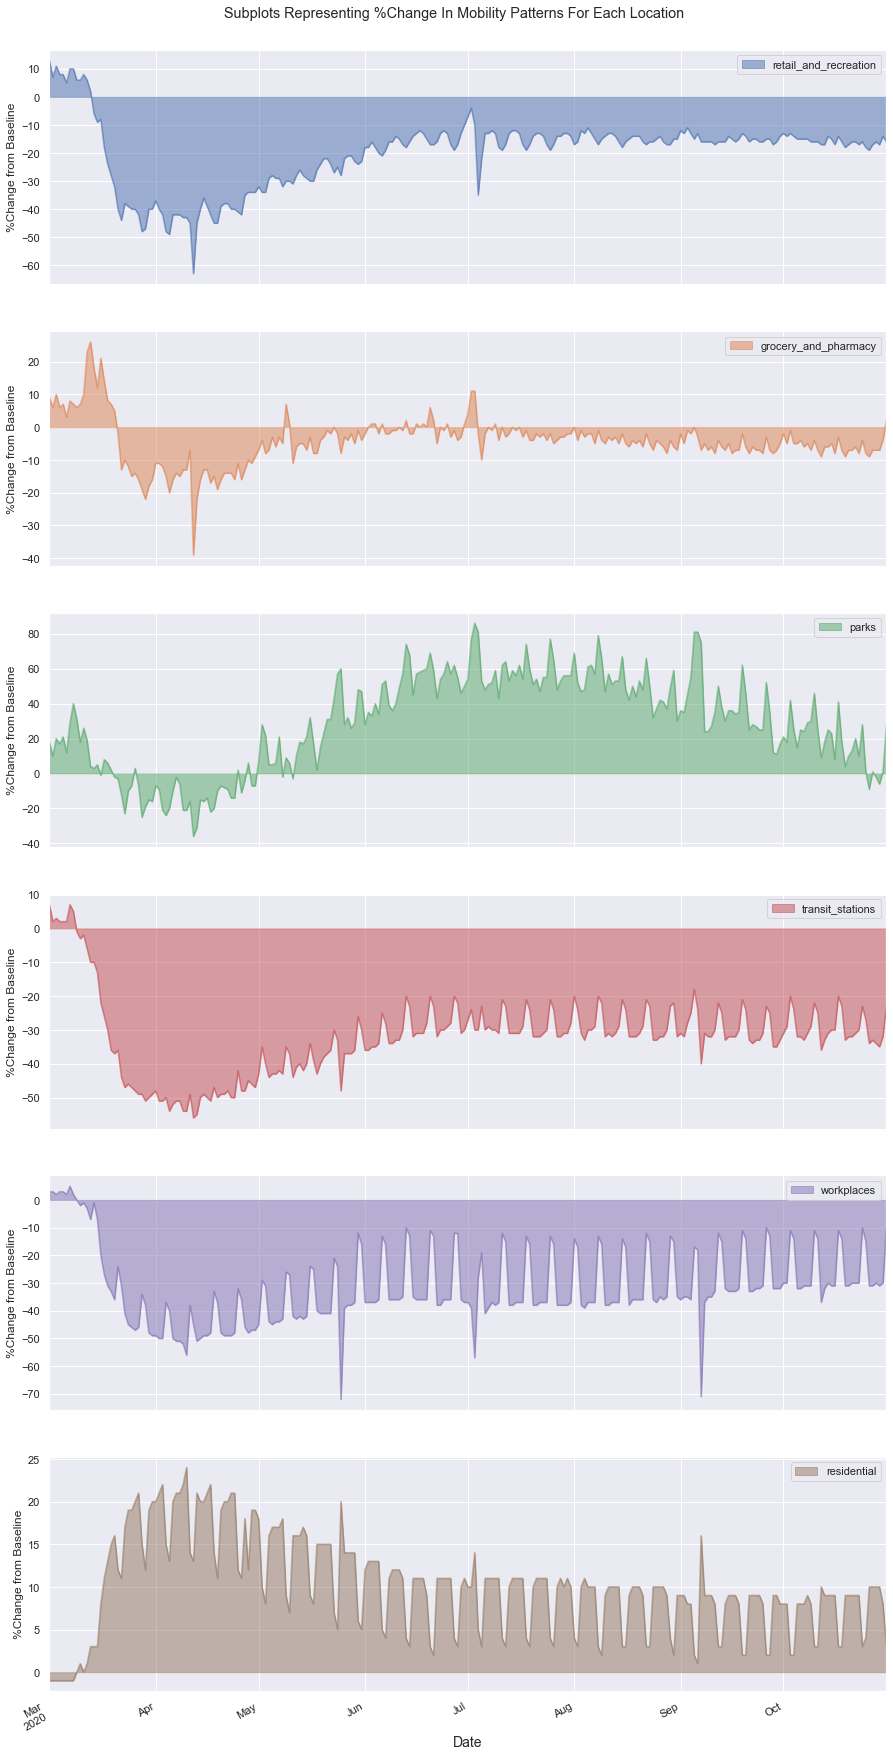

In [157]:
#creating subplots for each location
a1 = usa.plot.area(subplots = True, figsize=(15, 30), stacked = False, title ="Subplots Representing %Change In Mobility Patterns For Each Location")
plt.xlabel("Date", fontsize=14)
#formatting the title
plt.subplots_adjust(top=0.96)
#assigning a y axis to all graphs
for x in a1:
    x.set_ylabel('%Change from Baseline')

I created subplots with the raw data to generate a plot for each individual location:

**Retail and Recreation:** Retail and Recreation locations faced quite a drop in mobility from nearly the beginning of March. Close to halfway through April, we see a change of nearly -60% in mobility for retail and recreation locations, followed by another trough in July of -35%.

**Grocery and Pharmacy:** There is an initial increase of close to 30% in March. This is followed by a drop to just over -20% and then a spike of nearly -40% in the middle of April. This graph remains relatively close to the baseline but has a few smaller peaks and troughs of around 10% in July. 

**Parks:** Parks initially had a 40% increase from the baseline in the beginning of March, but as the pandemic got more serious, it saw a steep drop, at one point to nearly -40% in the middle of April. By May, they saw an increase in mobility, reaching +80% by July and September. There are regular peaks and troughs in this graph suggesting the peaks could be during weekends/holidays and the troughs during working days. 

**Transit Stations:** Transit stations faced a steep decline in mobility from the baseline throughout the pandemic, with the lowest point nearly hitting -60%. Transit stations too have regular peaks and troughs. 

**Workplaces:** Workplaces dropped in mobility overall, and we see multiple peaks and troughs throughout the pandemic. This again could suggest weekends having an impact on this. There is a spike of over -70% in May, nearly -60% in July and over -70% in september. These could be holidays from work. For example, the spike in July is at the beginning of the month, close to 4th of July which is a popular holiday in America. 

**Residential:** Residential locations have an upward trend throughout the pandemic. There are regular peaks and troughs here too, with the highest peak reaching nearly 25% in April. 

In [158]:
usa.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -20.008163             -4.248980   28.902041   
std                12.381567              7.318798   27.327825   
min               -63.000000            -39.000000  -36.000000   
25%               -27.000000             -7.000000    6.000000   
50%               -16.000000             -4.000000   30.000000   
75%               -14.000000             -1.000000   52.000000   
max                13.000000             26.000000   86.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -31.881633  -31.146939     9.946939  
std           11.811978   13.932612     5.688034  
min          -56.000000  -72.000000    -1.000000  
25%          -37.000000  -38.000000     7.000000  
50%          -32.000000  -36.000000    10.000000  
75%          -27.000000  -24.000000    13.000000  
max            7.000000    5.000000    24.000000

The describe() function is very useful to gather statistics from the data. The key pieces of information from this table are as following:

**mean:** The mean for transit stations is the furthest away from the baseline with -31.8% followed by workplaces with a -31.1% average mobility. This is interesting as it tells us people have been consistently avoiding transit stations and not going to work. Grocery and Pharmacy locations are closest to the baseline with -4.2%. There hasn't been a huge change in movement evidently. Parks had the greatest increase in average mobility with an average increase of 28.8%. 

**Min / Max:** The min and max values give us the peak and troughs of the data. As we can see, parks and groceries & pharmacies had the highest values, whereas retail & recreation and workplaces had the lowest. 

Looking at the smoothened data, we are able to gain insights into the general trends of the graphs.

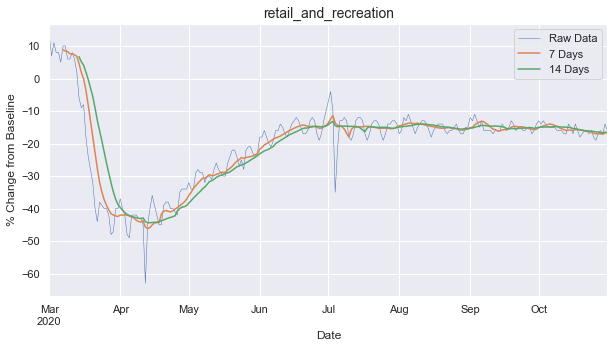

In [159]:
plotData(usa, "retail_and_recreation")

Retail and recreation areas faced a dip averaging nearly -50% in the middle of April. The mobility in these areas began to increase again at the start of May, continuing till the middle of July. Since that point, it seems to even off with an average mobility of approximately -15%. There is no indication of change in from this point.

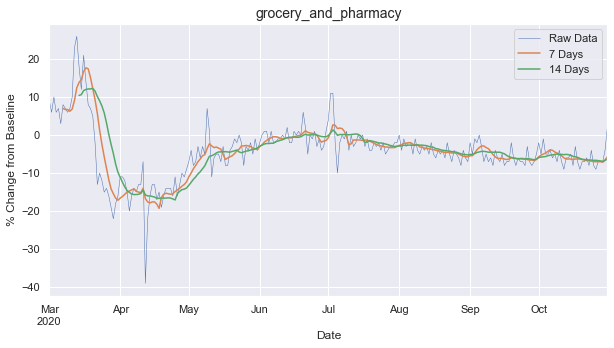

In [160]:
plotData(usa, "grocery_and_pharmacy")

Groceries and Pharmacies have increased in mobility in the beginning of the pandemic followed by a quick descent to nearly -20%. The mobility rose back to the baseline in June and halfway through July, when it gradually began decreasing again

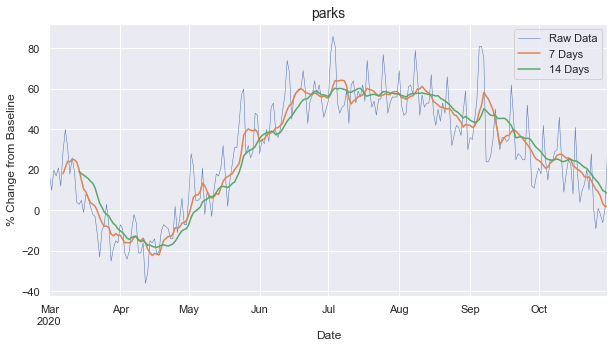

In [161]:
plotData(usa, "parks")

There is an initial dip to nearly -20% for parks in mid April, at which point there is a near linear increase up to July where it levels off and stays at +60% till about the middle of September. At this point, the wave begins to fall. 

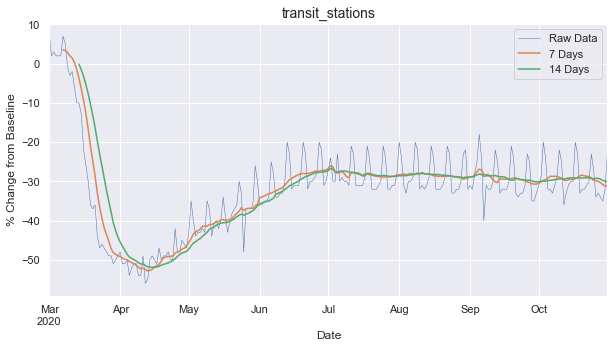

In [162]:
plotData(usa, "transit_stations")

Transit stations saw a linear increase from April to July. From July onwards, they seem to have an average Mobility of around -30%

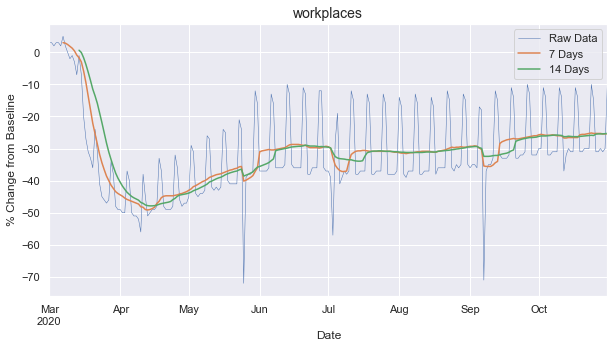

In [163]:
plotData(usa, "workplaces")

The smoothened data shows us that workplaces nearly half the workforce stayed away from their workplaces in the middle of April, until they began to gradually increase. The trend is still on an increasing path with an decrease of -25% in October, compared to the -50% in April

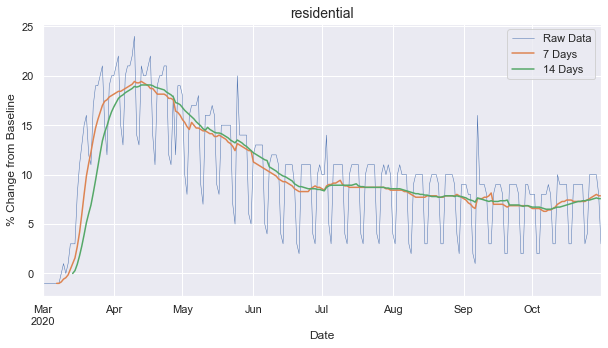

In [164]:
plotData(usa, "residential")

Residential areas have increased in Mobility overall. In the month of April, we can see there was highest mobility in residential areas. After this point, the trend seems to be decreasing and in October we see in increase of just 7%.

-----

**Part C) Compare  and  contrast  how  the  series  for  the  different  location  categories  have changed  over  time  for  the  country.  To  what  extent  are  these  series  correlated with one another?**

**Part D) Suggest  explanations  for  any  differences  that  you  have  observed  between  the time series for the location categories.**

To complete this, I will firstly graph the time series by month. I will then make a bar chart to see how the monthly average compares with the other locations. Finally, with the use of a correlation heatmap, I will see what locations have the highest and lowest correlation. Each of these will be accompanied with explanations for any differences I observed

Text(0, 0.5, '%Change from Baseline')

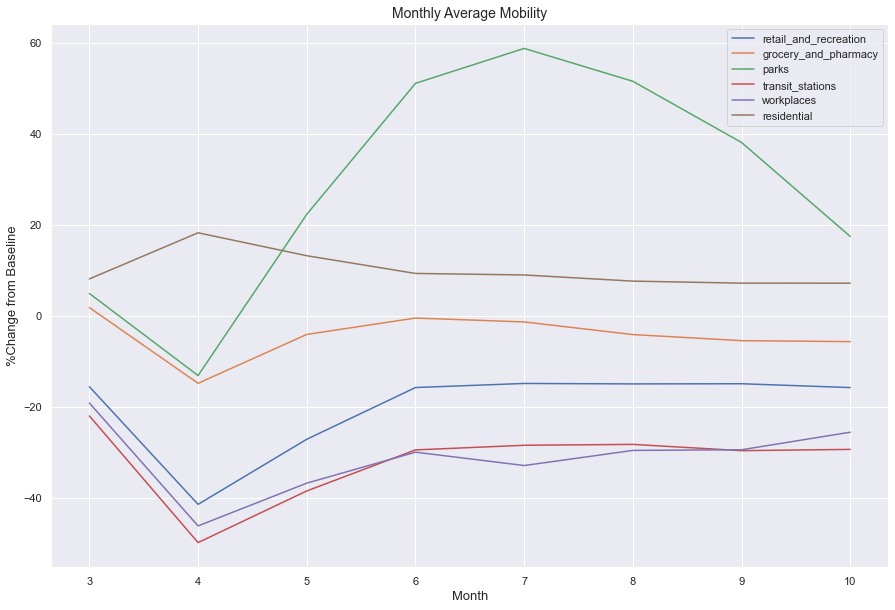

In [165]:
#grouping the mobility by month
usa_month = usa.groupby(usa.index.month).mean()
x = usa_month.plot(figsize=(15,10))
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

The month of April saw the most activity for all the locations. This could be due to the panic that the public faced at the beginning of the pandemic. All the locations except for parks seem to stabilise in the rest of the months. Parks face a wave interestingly. 

Text(0, 0.5, '%Change from Baseline')

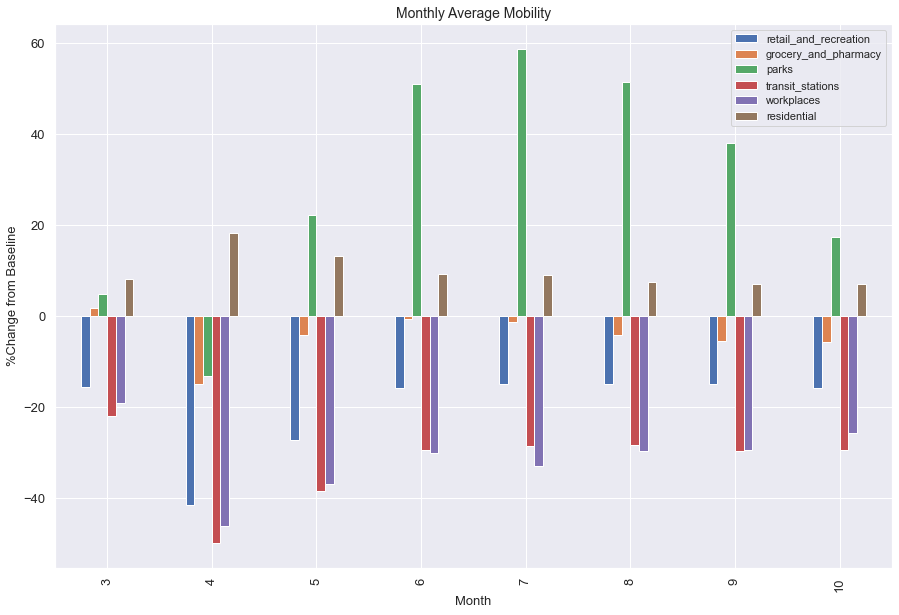

In [166]:
p = usa_month.plot(kind='bar',figsize=(15, 10), fontsize=13, zorder=3)
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

When we plot the monthly figures on a bar chat, it makes it quite clear to see the percentage changes over the months for all locations:

> In March, groceries & pharmacies, residential areas and parks were above the baseline. With the weather improving from January and February, it makes sense that there was increased mobility in Parks at the beginning of March, but as the pandemic got more serious, it may have driven consumers to start buying more and isolate themselves. 

> In April, we see that residential areas are the only location above the baseline. Workplaces, groceries & pharmacies, retail & recreation and transit stations face huge drops compared to the previous month. 

> In May, the overall mobility seems to increase from the previous month for all locations except residential areas. This makes sense since people are leaving their houses more. An interesting location to point out is the steep increase in mobility in Parks from the previous month. 

> In June, we see that groceries & pharmacies have nearly returned to the baseline. No other location has managed to do this. Parks seem to double in mobility, however the rest of the locations also increase but not as dramatic as parks. 

> In July, we see a drop in mobility in transit stations, grocery & pharmacies and workplaces. Residential areas seem to remain the same interestingly which leads me to think people may taking on holidays during this period and are speding their time outdoors. Parks reach their peak of nearly +60% from the baseline, the heat could make outdoor activities more appealing to people. 

> In August, we see a similariy to June. Grocery and pharmacies have decreased however. This leads me to believe there may have been an increase in corona cases thats causing people to restrict their movement. 

> In September, we see further decreases in Parks, however all the other locations remain relatively unchanged. This leads me to believe it's getting colder during this period and people are spending less time outside. As well as this, schools are set to reopen during this time. 

> In October, we see the same trend as September. All the other locations remain somewhat unchanged but parks have decreased even more. This could prove that the weather and college / school reopening has an affect on this. 

Text(0.5, 1.0, 'Heatmap of Locations')

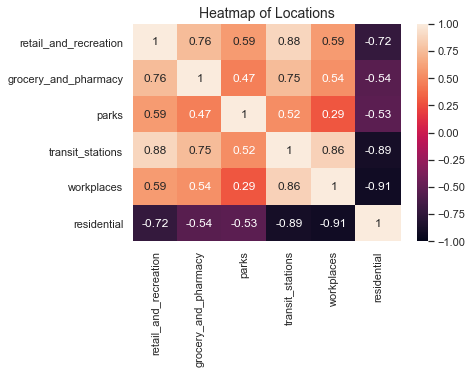

In [167]:
heatmap = sns.heatmap(usa.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Heatmap of Locations", fontsize = 14)

I created a heatmap which displays the correlation between different locations. Any correlation that equals to 1 is comparing itself, so we will look for the next closest number. 

- Highest Correlation is between Retail & Recreational and Transit Stations.
- Lowest Correlation is between Residential areas and Workplaces.

Text(0.5, 1.0, 'Regplot of Highest Correlation')

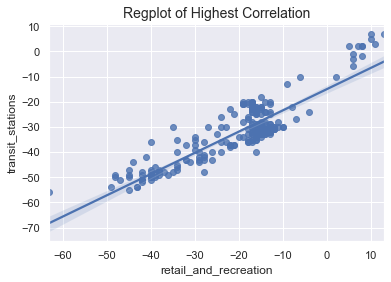

In [168]:
#making a regplot
sns.regplot(x="retail_and_recreation", y="transit_stations", data=usa);
plt.title("Regplot of Highest Correlation", fontsize = 14)

Text(0, 0.5, '% change')

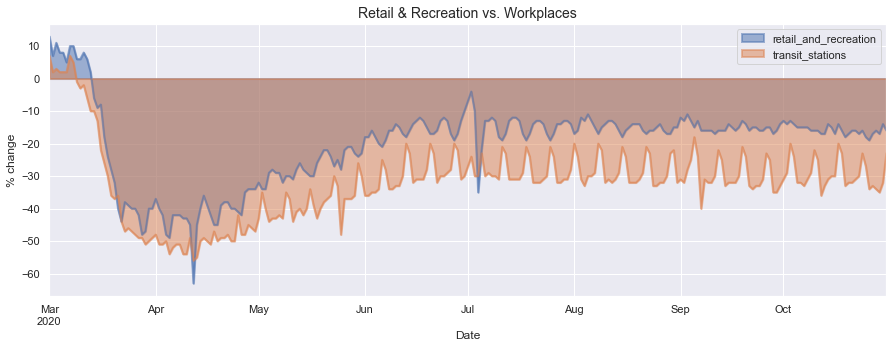

In [169]:
#graphing both locations together
rr_t = usa.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["retail_and_recreation","transit_stations"])
plt.title("Retail & Recreation vs. Workplaces", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

As we can see here, retail & recreational areas have a very strong correlation with transit stations. They are close to being directly proportional on the relation plot, and the shape of the 2 graphs are similar meaning they follow a trend closely. This relationship could make sense as people are more reluctant to take public transport and go to retail or recreational areas when the cases are high, so they might avoid these areas. 

Text(0.5, 1.0, 'Regplot of Lowest Correlation')

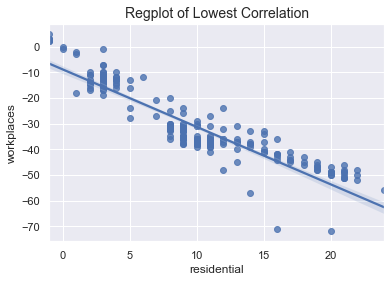

In [170]:
#making a reg plot
sns.regplot(x="residential", y="workplaces", data=usa);
plt.title("Regplot of Lowest Correlation", fontsize = 14)

Text(0, 0.5, '% change')

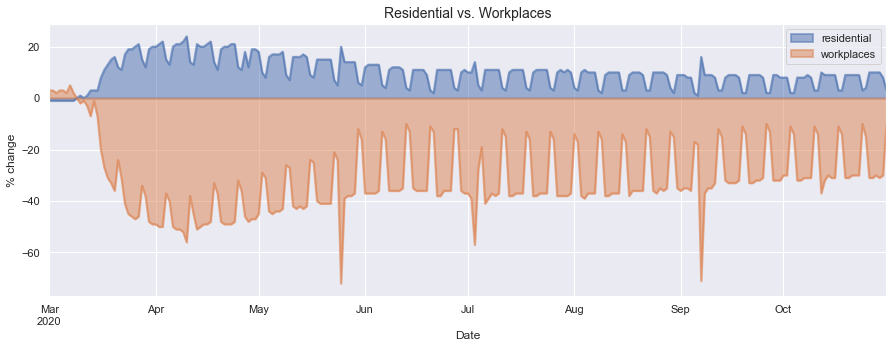

In [171]:
#graphing both locations together
r_w = usa.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["residential","workplaces"])
plt.title("Residential vs. Workplaces", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

Residential areas and workplaces have a close to inverse correlation with each other. The slope of the relation plot displays this. Interestingly, the graph shows no overlap past the middle of March. This inverse correlation makes sense because people are going to workplaces less and staying at home more. 

-----

**Concluding Remarks for United States of America**

**Retail and Recreation:**  Retail and recreation areas recovered from their initial loss in April. Although they are still averaging -15% mobility, it seems to have reached a point of stability and it will probably remain at this point until the vaccines arrive. 

**Grocery and Pharmacy:** Although Grocery & Pharmacies are on a downwards trend, I expect it to get closer to the baseline once again. This is due to the fact that people can't stay away from these essential items for too long

**Parks:** Parks saw a huge increase in mobility over the summer, but I expect this to continue to decrease as it gets colder. The cases don't seem to have a huge impact on mobility in parks since it is outdoors and people can socially distance themselves. 

**Transit Stations:** Transit stations reached a point of stability at around -30% mobility. This will presumably continue until the vaccines arrive since the frequency of public transport may have decreased and the capacity on the public transport may have also decreased. 

**Workplaces:** Workplaces are expected to rise closer to the baseline in my opinion. General productivity could possibly be improved with people in an office environment and as a result companies may begin phasing people back into workplaces. The graph is also on an increasing trend at the moment so we could see this continue. 

**Residential:** In my opinion, there could be an increase in residential areas during December due to holidays coming up, so college students and people at work may be returning to their homes for the holidays. 

----

## Country 3: United Kingdom 

**Part a) Construct a set of time series that represent the mobility patterns for the different location categories for the country**

To complete this, I must first use my function to format the data in order to create table that contains my set of time series data. I will then create an overall visualisation containing all of the locations in this country.

In [172]:
#using the fucntion to format data for all countries
uk = formatData(uk)

In [173]:
#checking to see I don't have any strings for the numbers
uk.dtypes.value_counts()

float64    6
object     1
dtype: int64

In [174]:
#making sure I have no null columns
uk.isnull().sum()

country                  0
retail_and_recreation    0
grocery_and_pharmacy     0
parks                    0
transit_stations         0
workplaces               0
residential              0
dtype: int64

In [175]:
uk.head()

country  retail_and_recreation  grocery_and_pharmacy  \
dates                                                                     
2020-03-01  United Kingdom                    7.0                   2.0   
2020-03-02  United Kingdom                    4.0                   4.0   
2020-03-03  United Kingdom                    2.0                   3.0   
2020-03-04  United Kingdom                    2.0                   3.0   
2020-03-05  United Kingdom                   -1.0                   2.0   

            parks  transit_stations  workplaces  residential  
dates                                                         
2020-03-01   14.0               5.0         1.0         -1.0  
2020-03-02   14.0               0.0         1.0          0.0  
2020-03-03   11.0              -1.0         1.0          0.0  
2020-03-04    2.0              -2.0         1.0          1.0  
2020-03-05    1.0              -3.0         0.0          1.0

This is my time series dataset for United Kingdom. The Date is set as the index and the values represent percentage change.

Text(0, 0.5, '% Change from Baseline')

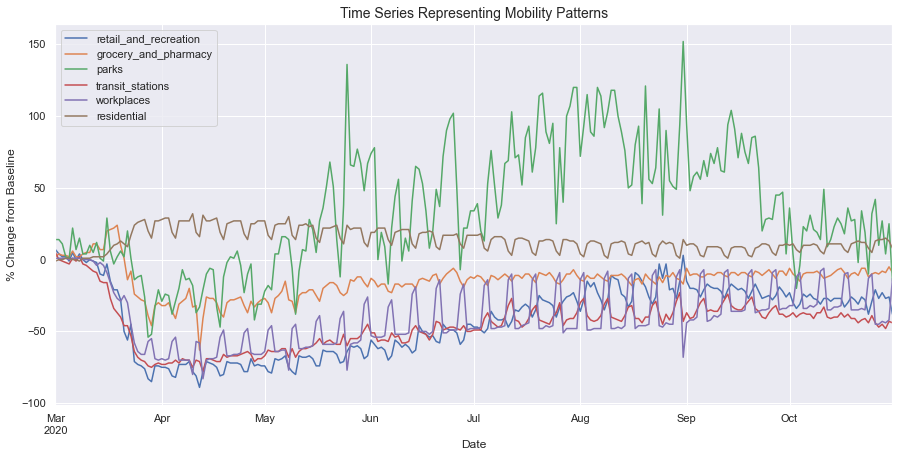

In [176]:
#plotting the graph
u = uk.plot(figsize=(15, 7))
plt.title("Time Series Representing Mobility Patterns", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Change from Baseline", fontsize=12)

> - The plot that is visualised here displays all the different locations over time. 
> - We can see that there are a few potential outliers in grocery & pharmacy, workplaces and parks. We will look into these in more detail later. 
> - It's quite difficult to analyse further with this graph, so we will further characterise and visualise this time series to gain some insights

----

**Part b) Characterise  and  visualise  each  of  these  time  series**

I will perform a visual inspection of the time series, compute summary statistics and talk about some general trends in the series.

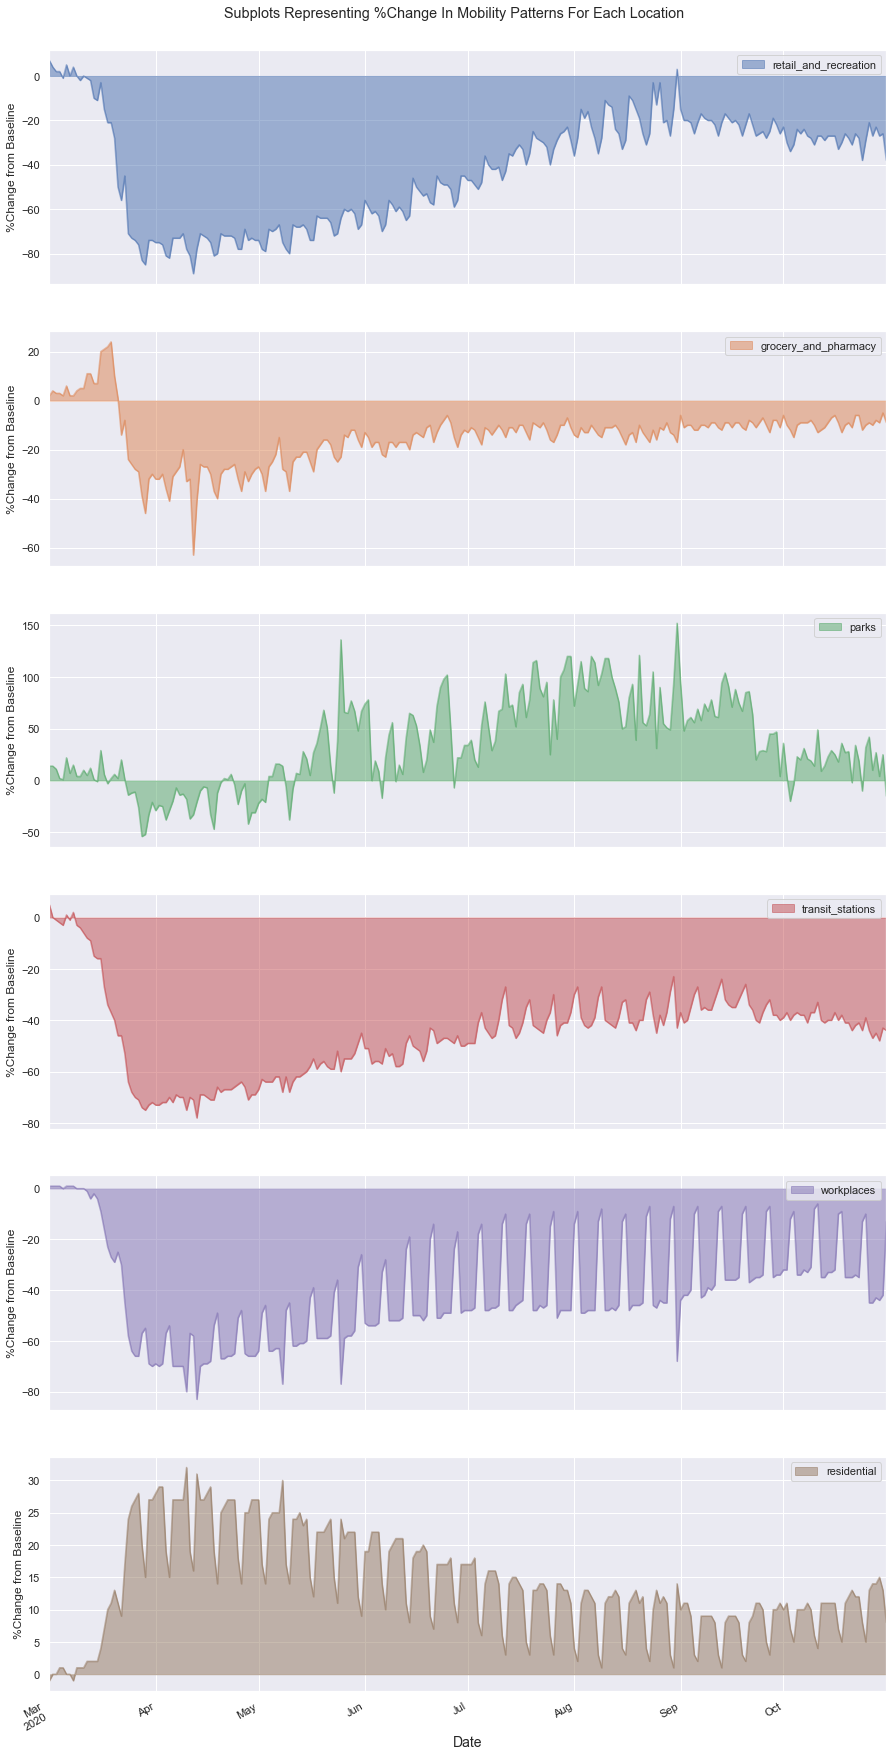

In [177]:
#creating subplots for each location
a1 = uk.plot.area(subplots = True, figsize=(15, 30), stacked = False, title ="Subplots Representing %Change In Mobility Patterns For Each Location")
plt.xlabel("Date", fontsize=14)
#formatting the title
plt.subplots_adjust(top=0.96)
#assigning a y axis to all graphs
for x in a1:
    x.set_ylabel('%Change from Baseline')

I created subplots with the raw data to generate a plot for each individual location:

**Retail and Recreation:** Retail and Recreation locations faced quite a drop in mobility from nearly the beginning of March to the middle of May. The mobility was hovering around -80% during this period, with a spike of over -90%. since that point, it has been on the rise again and at the end of August / start of September, the mobility peaked slightly over the baseline. Since that point, it began to drop again.

**Grocery and Pharmacy:** There is an initial increase of close to 20% in March. This is followed by a drop to just over -40% and then a spike of nearly -60% in the middle of April. Since that point, The graph remains at around -10% to -20% consistently. 

**Parks:** Mobility in Parks has been very varied. There are a vast number of peaks and troughs in this graph. The highest peak hit 150% in August and the lowest point was around -50% in March. The busiest period seems to be from July to September.  

**Transit Stations:** Transit stations saw a decline of nearly 80% in the first 2 months, since this point, it has been on an increasing trend with regular peaks and troughs until September, when it starts decreasing again.

**Workplaces:** Mobility around workplaces dropped to over -80% in April. Since then, we see regular peaks and troughs on an increasing trend. There are a few further spikes in May and August. These could be periods where people were on holidays. 

**Residential:** Residential areas hit a peak of over 30% in April, and since that point it is on a decreasing trend until the middle of september when it starts to rise again. The graph has regular peaks and troughs indicating movement regularly. 

In [178]:
uk.describe()

retail_and_recreation  grocery_and_pharmacy       parks  \
count             245.000000            245.000000  245.000000   
mean              -41.600000            -14.608163   35.110204   
std                24.309042             11.360051   42.638397   
min               -89.000000            -63.000000  -54.000000   
25%               -66.000000            -19.000000    4.000000   
50%               -35.000000            -13.000000   29.000000   
75%               -23.000000            -10.000000   67.000000   
max                 7.000000             24.000000  152.000000   

       transit_stations  workplaces  residential  
count        245.000000  245.000000   245.000000  
mean         -45.322449  -39.787755    13.669388  
std           16.850540   20.578813     7.930596  
min          -78.000000  -83.000000    -1.000000  
25%          -57.000000  -53.000000     9.000000  
50%          -43.000000  -45.000000    13.000000  
75%          -37.000000  -27.000000    19.000000  
max            5.000000    1.000000    32.000000

The describe() function is very useful to gather statistics from the data. The key pieces of information from this table are as following:

**mean:** The mean for transit stations is the furthest away from the baseline with -45.3% followed by retail and recreation areas with a -41.6% average mobility. This is interesting as it tells us people have been consistently avoiding transit stations and retail & recreation locations. Residential locations are closest to the baseline with 13.7%. This tells us that there hasn't been a major push for people to stay at home. 

**Min / Max:** The min and max values give us the peak and troughs of the data. As we can see, parks and groceries & residential areas had the highest values, whereas retail & recreation and transit stations had the lowest. 

Looking at the smoothened data, we are able to gain insights into the general trends of the graphs.

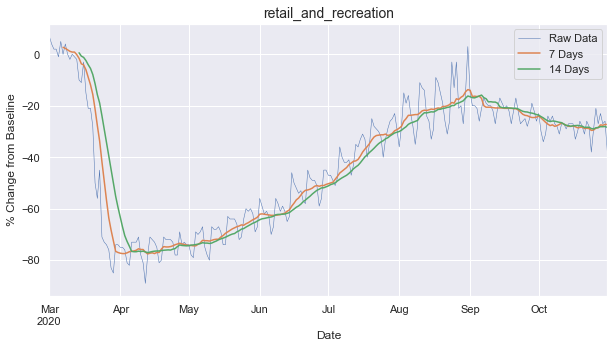

In [179]:
plotData(uk, "retail_and_recreation")

Retail and recreation areas faced a dip averaging nearly -80% in the middle of April. The mobility in these areas began to increase again in the middle of April, continuing till the the end of September. From the start of October, it begins decreasing. 

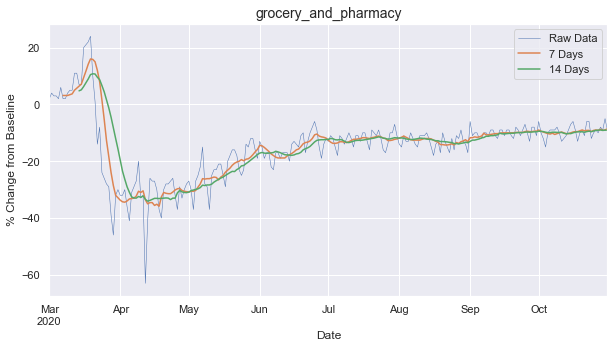

In [180]:
plotData(uk, "grocery_and_pharmacy")

Groceries and Pharmacies have increased in mobility in the beginning of the pandemic followed by a quick descent of over -30%. The mobility rose again and since the beginning of July, it is averaging aroung -10% mobility

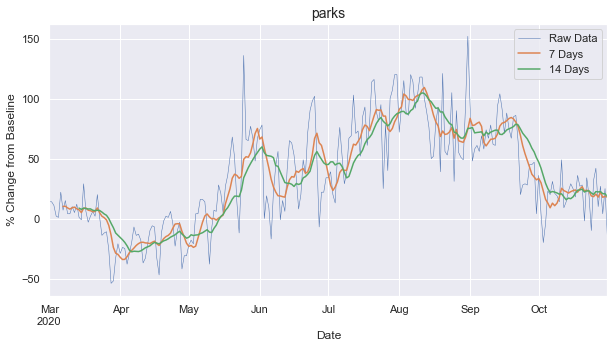

In [181]:
plotData(uk, "parks")

From April to June, there has been a rise in mobility for parks. It then begins decreasing and increasing in June and July, until it hits the peak in August with an average mobility of 100%. Since that point it begins decreasing again. The irregularities could correlate to unexpected weather patterns and that would explain the lack of people going to parks. 

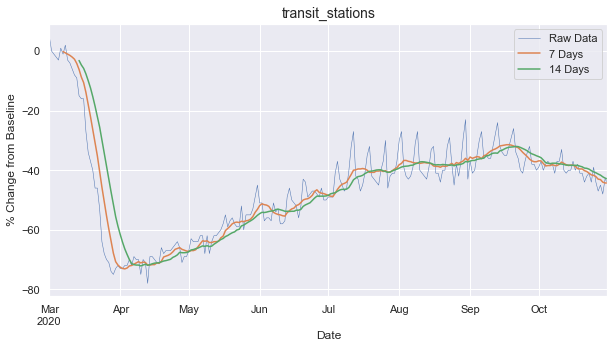

In [182]:
plotData(uk, "transit_stations")

After a drop of nearly -80%, trasit stations were on a rise intil the middle of september when they began to decrease once again. The linear growth suggests people were easing back into using public transport. 

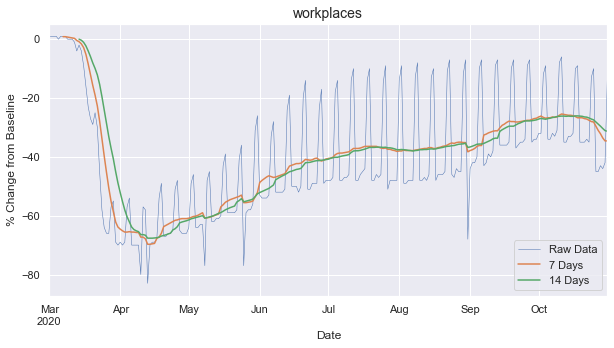

In [183]:
plotData(uk, "workplaces")

From the middle of April, workplaces start to see greater footfall. From an average of -70% to around -30% in October, it is clear that people are slowly getting back to their workplaces in the UK.

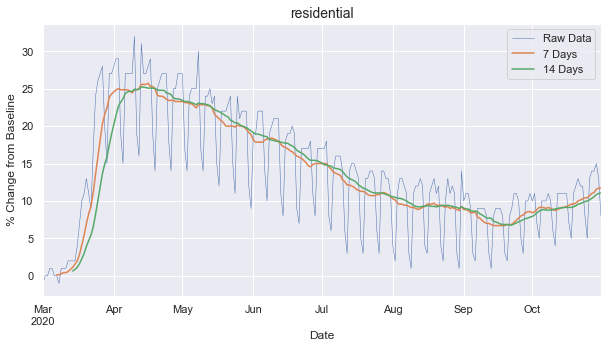

In [184]:
plotData(uk, "residential")

The peak of residential areas was in April when it was at around 25%. Since then, it has been decreasing linearly till mid September. From this point onwards, it begins to rise again. A potential reason for this could be the introduction of another lockdown, or perhaps an increase in cases.

----

**Part C) Compare  and  contrast  how  the  series  for  the  different  location  categories  have changed  over  time  for  the  country.  To  what  extent  are  these  series  correlated with one another?**

**Part D) Suggest  explanations  for  any  differences  that  you  have  observed  between  the time series for the location categories.**

To complete this, I will firstly graph the time series by month. I will then make a bar chart to see how the monthly average compares with the other locations. Finally, with the use of a correlation heatmap, I will see what locations have the highest and lowest correlation. Each of these will be accompanied with explanations for any differences I observed

Text(0, 0.5, '%Change from Baseline')

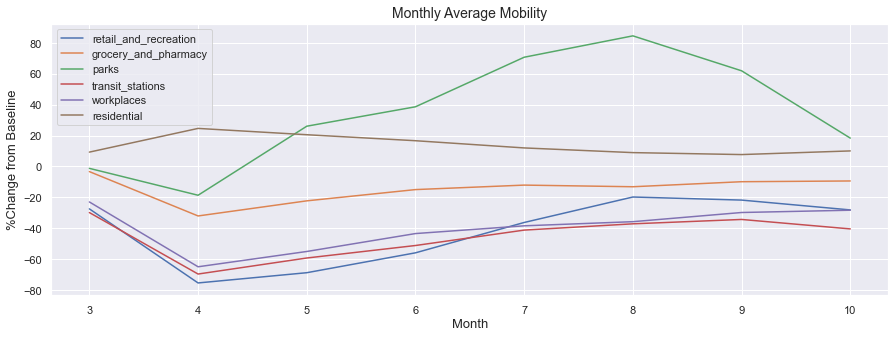

In [185]:
#grouping the mobility by month
uk_month = uk.groupby(uk.index.month).mean()
x = uk_month.plot(figsize=(15,5))
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

April had the most activity in terms of mobility. Parks and Retails & Recreation areas have varied mobility throughout the period but the rest seem to have stabilised. 

Text(0, 0.5, '%Change from Baseline')

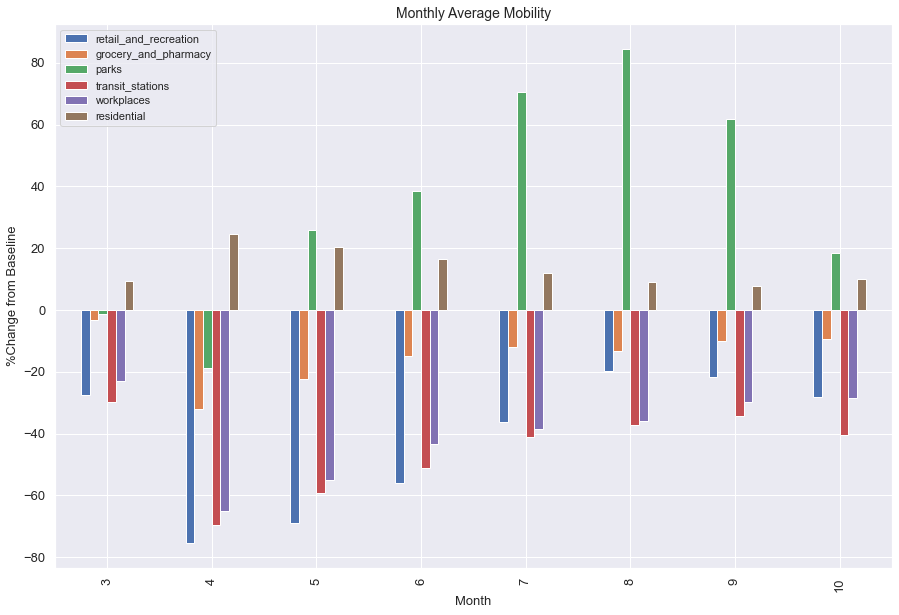

In [186]:
p = uk_month.plot(kind='bar',figsize=(15, 10), fontsize=13, zorder=3)
plt.title("Monthly Average Mobility", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

When we plot the monthly figures on a bar chat, it makes it quite clear to see the percentage changes over the months for all locations:

> In March, residential areas was the only location above the baseline. Mobility in the rest of the locations was under the baseline. This is understandable because they might have been given strict stay at home orders by the government. 

> In April, we see a huge decrease in all locations, except residential areas which see an increase. This could suggest the country was in lockdown at this stage. Interestingly, there eas a greater decrease in essential shopping with groceries and pharmacies than there was in parks. 

> In May, there is a huge increase in mobility for parks. It surpasses the mobility for residential areas. As colleges would be finished by now, this would explain this. It also makes sense as to why transit stations are increasing in mobility as students may want to get back home. 

> In June, we see a similar trend to May, with parks increasing and the other locations also increasing in mobility, except for residential areas. Schools would also be finished by now which could explain the increase in footfall in these areas. 

> In July, interestingly, mobility in parks nearly doubles and retail & recreation areas have surpassed workplaces and transit stations. A potential reason for this could be the attitude people have towards coronavirus. It seems as though leisure activities are taking a priority. Another potential reason could be better handling by businesses that allows for them to open.

> In August, we notice an increase in all locations except for residential areas yet again. As the last month of summer and potentially low restrictions in place, this would make sense. 

> In September, we begin to notice a decrease in mobility in parks and retail & recreation areas. Students going back to school could be a potential reason for this.

> In October, mobility in parks is cut down by 3 times. We also notice an increase in residential areas and a decrease in transit stations. The cases increasing could be a potential reason for this.

Text(0.5, 1.0, 'Heatmap of Locations')

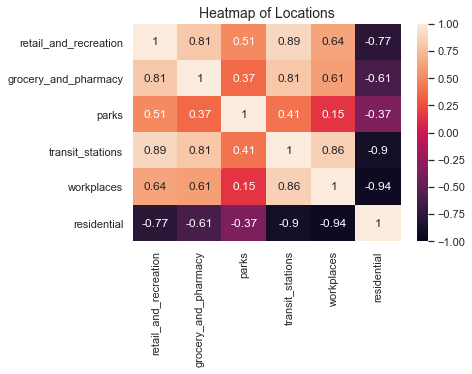

In [187]:
heatmap = sns.heatmap(uk.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Heatmap of Locations", fontsize = 14)

I created a heatmap which displays the correlation between different locations. Any correlation that equals to 1 is comparing itself, so we will look for the next closest number. 

- Highest Correlation is between Retail & Recreational and Transit Stations.
- Lowest Correlation is between Residential areas and Workplaces.

Text(0.5, 1.0, 'Regplot of highest correlation')

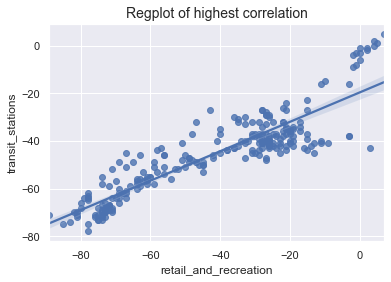

In [188]:
sns.regplot(x="retail_and_recreation", y="transit_stations", data=uk);
plt.title("Regplot of highest correlation", fontsize = 14)

Text(0, 0.5, '% change')

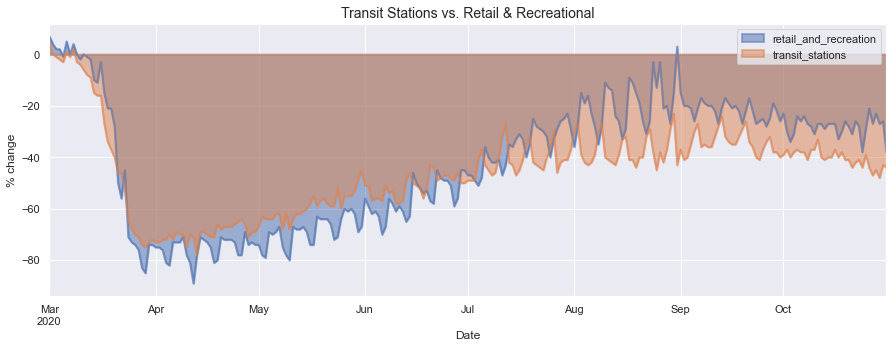

In [189]:
rr_t = uk.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["retail_and_recreation","transit_stations"])
plt.title("Transit Stations vs. Retail & Recreational", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

As we can see here, retail & recreational areas have a very strong correlation with transit stations. They are close to being directly proportional on the relation plot. Despite there being some differences in the periods between July and October, the graphs still follow a similar trend. This relationship could make sense as people are more reluctant to take public transport and go to retail or recreational areas when the cases are high, so they might avoid these areas. 

Text(0.5, 1.0, 'Regplot of Lowest Correlation')

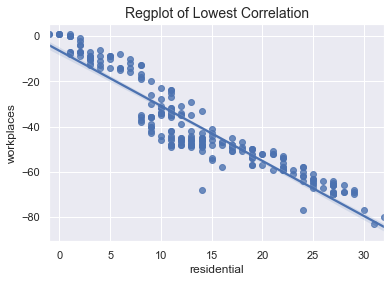

In [190]:
sns.regplot(x="residential", y="workplaces", data=uk);
plt.title("Regplot of Lowest Correlation", fontsize = 14)

Text(0, 0.5, '% change')

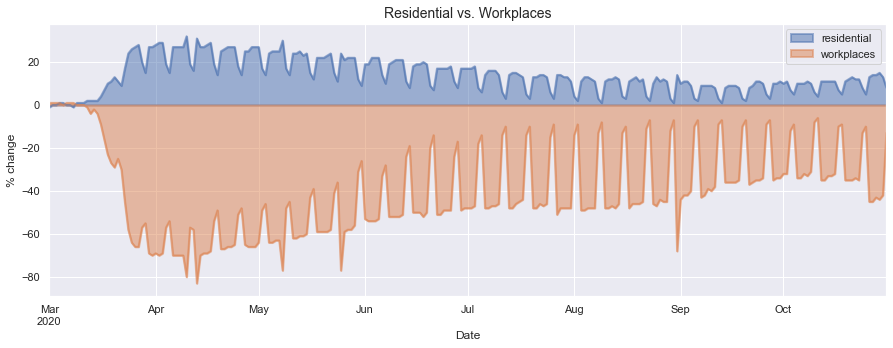

In [191]:
r_w = uk.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["residential","workplaces"])
plt.title("Residential vs. Workplaces", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

Residential areas and workplaces have a close to inverse correlation with each other. The slope of the relation plot displays this. Interestingly, the graph shows no overlap past the middle of March. This inverse correlation makes sense because people are going to workplaces less and staying at home more. 

-----

**Concluding Remarks for United Kingdom**

**Retail and Recreation:**  Retail & Recreational locations must have incurred heavy losses at the beginning of the pandemic. Although there was a gradual increase in mobility, there is no sign of stability due to another decrease starting in September. The impact this has on local businesses must be immense. 

**Grocery and Pharmacy:** Groceries and Pharmacies surprisingly stayed far away from the baseline considering they are essential goods. A reason for this could be the use of delivery apps to get the food to their door, or even tight restrictions in the shops so that not many people can enter at once. 

**Parks:** Parks saw varied mobility throughout the pandemic, mostly well above the baseline. My prediction is that parks will be on a decreasing trend from now on due to seasonal factors rather than Covid.

**Transit Stations:** Transit Stations, like Retail & Recreation areas, has no real sign of stabilising fully. I predict the mobility will not increase above -30% due to restrictions on public transport

**Workplaces:** Workplaces are a fair bit away from the baseline at the moment but I expect it to rise close to the -10% / -15%  mark. Businesses will be eager to get their employees back and the British government may allow for it to happen in order to avoid paying any unemployment payments.

**Residential:** As seen in the graph, residential areas are on an increasing trend from October onwards. With many colleges operating from home and with the holiday season coming up, we could see an increase in footfall in residential areas. It will be interesting to see the % increase in mobility with the Christmas lockdown resrictions in the UK

-----

## Task 2 - Between Country Analysis

**Part a) Construct a set of time series that represent the overall mobility patterns for the three countries.**

For this part, I will firstly create a function to get the average of the columns, and then the average of the rows. I will represent this on graphs respectively

In [192]:
a = average(aus, usa, uk, 1)

In [193]:
#checking to see I don't have any strings for the numbers
a.dtypes.value_counts()

float64    3
dtype: int64

In [194]:
#making sure I have no null columns
a.isnull().sum()

Australia    0
USA          0
UK           0
dtype: int64

In [195]:
a.head()

Australia       USA        UK
dates                                    
2020-03-01   6.000000  8.166667  4.666667
2020-03-02   3.333333  4.500000  3.833333
2020-03-03   2.333333  7.500000  2.666667
2020-03-04   2.833333  5.833333  1.166667
2020-03-05   1.166667  6.666667  0.000000

This is my time series dataset for all three counties. The Date is set as the index and the values represent percentage change from the baseline.

Text(0, 0.5, '% Change from Baseline')

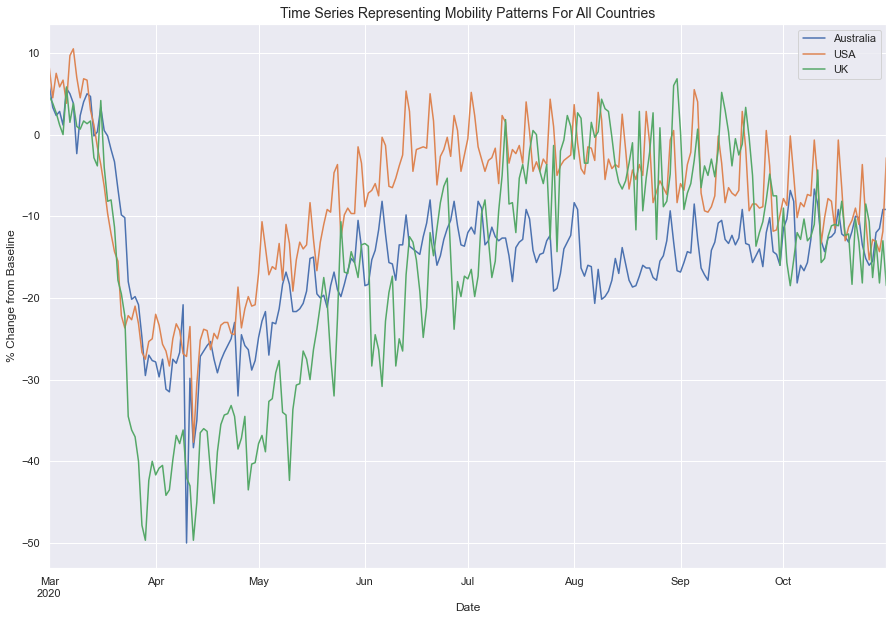

In [196]:
c = a.plot(figsize=(15, 10), stacked=False)
plt.title("Time Series Representing Mobility Patterns For All Countries", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Change from Baseline", fontsize=12)

> - The plot that is visualised here displays all the countries over the months in question
> - We can see that there are a few potential outliers in the three countries
> - It's quite difficult to analyse further with this graph, so we will further characterise and visualise this time series to gain some insights

----

**Part b) Characterise  and  visualise  each  of  these  time  series**

I will perform a visual inspection of the time series, compute summary statistics and talk about some general trends in the series.

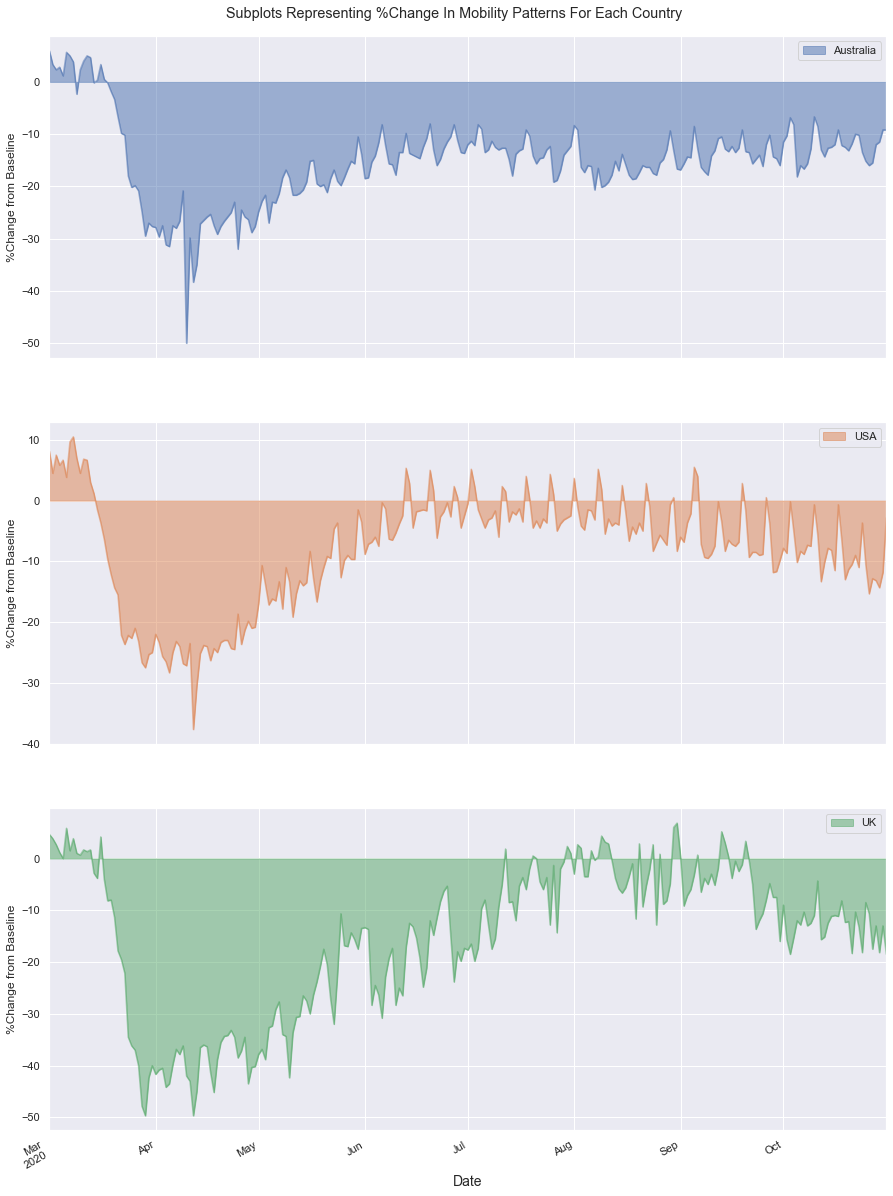

In [197]:
a1 = a.plot.area(subplots = True, figsize=(15, 20), stacked = False, title ="Subplots Representing %Change In Mobility Patterns For Each Country")
plt.xlabel("Date", fontsize=14)
#formatting the title
plt.subplots_adjust(top=0.96)
#assigning a y axis to all graphs
for x in a1:
    x.set_ylabel('%Change from Baseline')

I created subplots with the raw data to generate a plot for each country:

**Australia:** There is an initial drop in overall mobility until the middle of April with a spike of -50%. At this point, we can see that the overall mobility begins to increase until it hits May. From this point onwards, it has many peaks and troughs but hovers under -20% for the rest of the duration. 

**USA:** Similar to Australia, there is an initial drop in overall mobility until the middle of April with a spike of -40%. This is followed by an high increase in overall mobility. So much so that in June the overall mobility goes above the baseline frequently until September when it begins to decrease again. 

**UKs:** The United Kingdom faces a longer period of decreased mobility. Throughout April and May, we see 2 spike of mobility reaching -50%. From this point, it begins to rise with peaks and troughs throughout. The end of July/start of August sees a rise above the baseline in overall mobility. This is sustained until the middle of September when it begins to decrease again


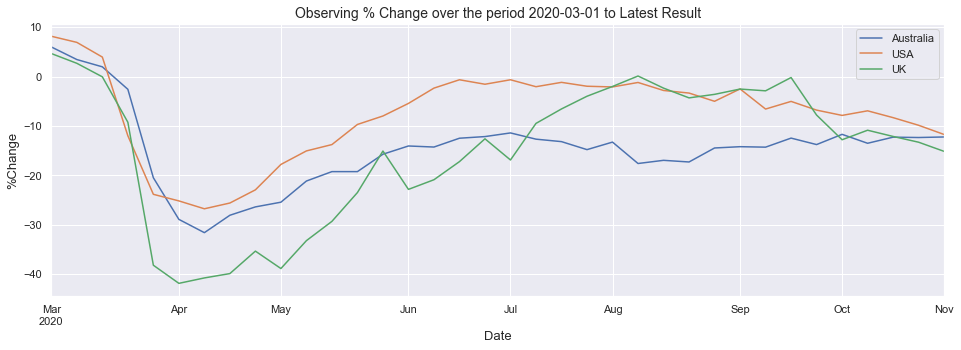

In [198]:
plotByDate("2020-03-01", " ")

Observing the resampled data for the ful data set. The overall trend shows a dip in April and May. From that point, the lines begin to increase again and end up in a similar percentage change. 

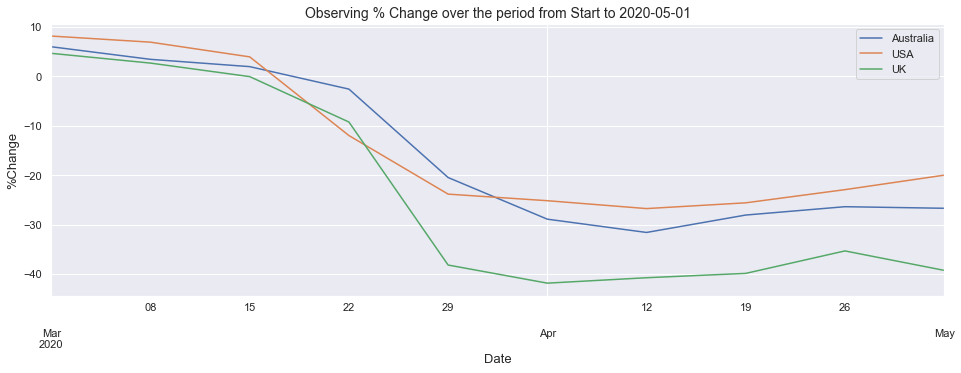

In [199]:
plotByDate(" ", "2020-05-01")

Observing the data from the start of the dataset in March to the start of May. As we can see, the dip in mobility begins at around the 15th of March for all countries. The dip continues till around the middle of April, when it start leveling off 

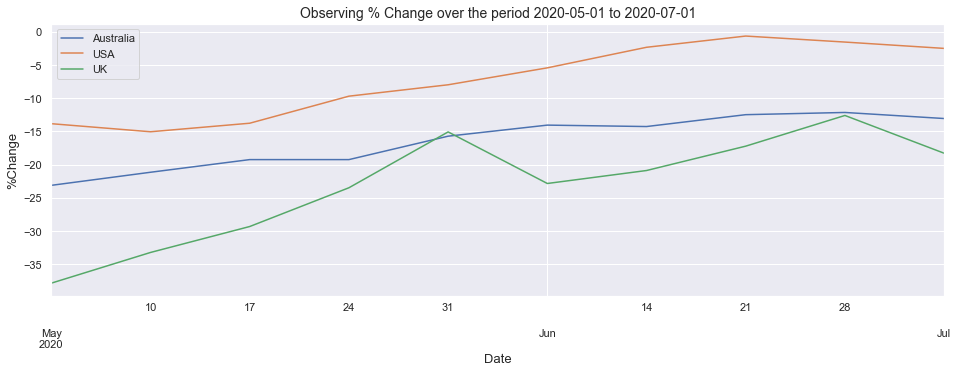

In [200]:
plotByDate("2020-05-01", "2020-07-01")

From the start of May to the start of July, we see that Australia and the USA start their ascent, with USA hitting the baseline on the 21st of June. Australia's rise is more gradual. The UK sees 2 peaks, on the 31st of June and 28th of July. It still has the lowest rise in overall mobility compared to the other 2 countries. 

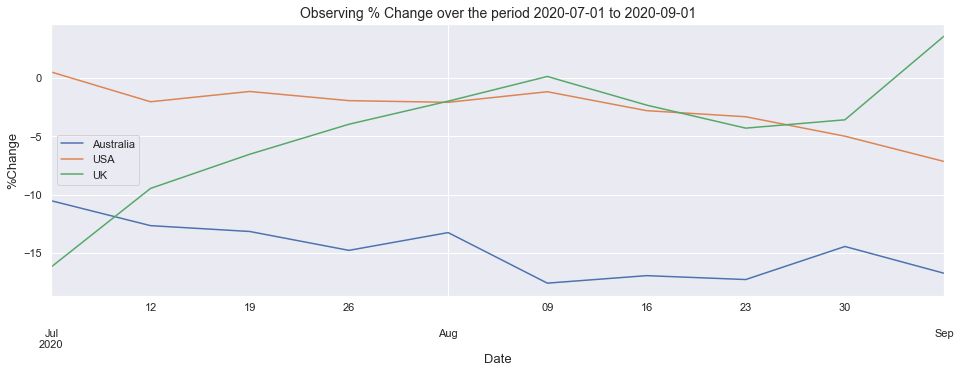

In [201]:
plotByDate("2020-07-01", "2020-09-01")

The start of July sees Australia and US on a decreasing trend, while the UK rises above the baseline at the end of September

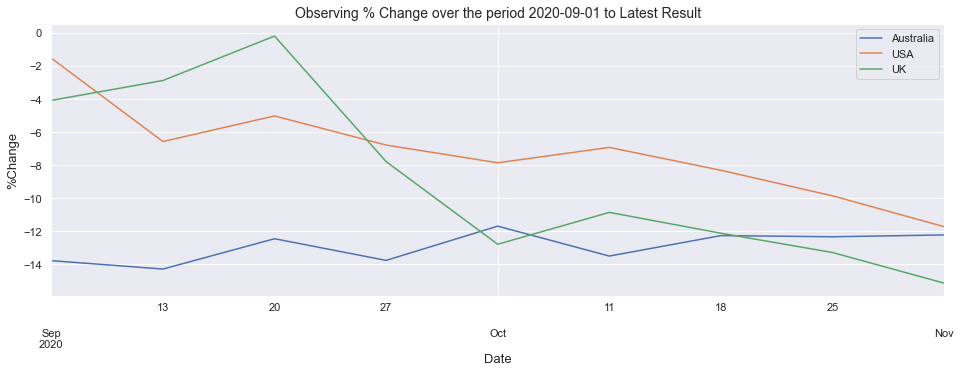

In [202]:
plotByDate("2020-09-01", " ")

The United Kingdom faces a steep drop from the 20th of September onwards. The USA also faces a more gradual drop, whereas Australia remains around the same change

In [203]:
a.describe()

Australia         USA          UK
count  245.000000  245.000000  245.000000
mean   -15.197959   -8.072789  -15.423129
std      8.029001    9.152487   14.329103
min    -50.000000  -37.666667  -49.666667
25%    -18.666667  -13.000000  -26.333333
50%    -14.666667   -6.500000  -12.500000
75%    -12.000000   -1.833333   -3.833333
max      6.000000   10.500000    6.833333

The describe() function is very useful to gather statistics from the data. The key pieces of information from this table are as following:

**mean:** As we can see, the United States has the closest average overall mobility to the baseline. The United Kingdom and Australia have very similar figures from the baseline. 

**Min / Max:** The United States has the highest overall mobility with 10.5%, whereas Australia and the UK have 6% and 6.8% respectively. Australia has the lowest overall mobility with -50% followed closely by Australia with -49.7%. The United States has -37.7%.

The graphs and the stats tell us that the United States has the highest overall mobility. This could be due to a lack of restrictions put in place by the government. 

We will now characterise and visualise the overall mobility for the individual locations of all 3 countries

In [204]:
#using average function specifying colums this time
a1 = average(aus, usa, uk, 0)

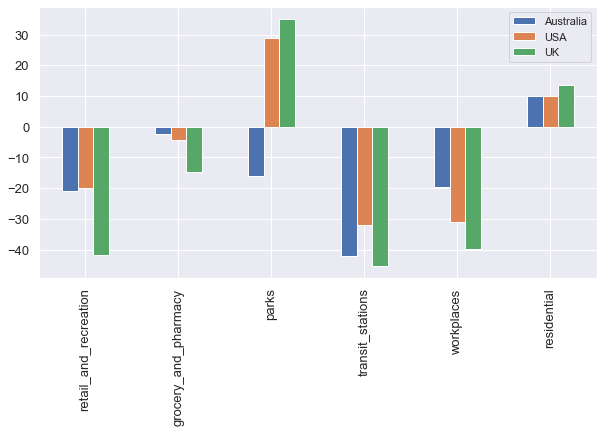

In [205]:
#creating a comparison bar chart for each of the different locations
axRow = a1.plot(kind='bar',figsize=(10, 5), fontsize=13, zorder=3)

As we can see from the graph above, the United Kingdom faces the highest decrease in overall mobility for retail and recreational areas, and grocery & pharmacies. The United Kingdom and USA have an overall mobility above the baseline for parks, unlike Australia. This could be due to seasonal differences. All three countries have an overall decrease in mobility in Transit Stations, with the United States having the highest of the 3. The UK faces the largest drop in mobility for workplaces, and Australia has the lowest decrease out of the three countries. Finally, all three countries have an overall increase in mobility in residential areas, but UK has the highest of the three. 

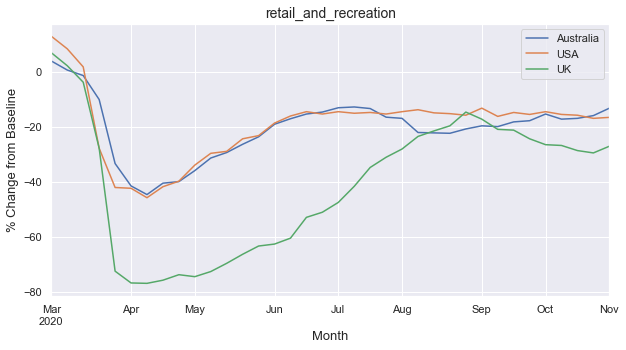

In [206]:
plotCountryData("retail_and_recreation")

As we can see, Australia and USA have a very similar percentage change in overall mobility in retail and recreation areas throughout the pandemic. A reason for this could be that they opened their stores for business sooner than the UK which took 6 months to catch up, and then faced a decline soon after. 

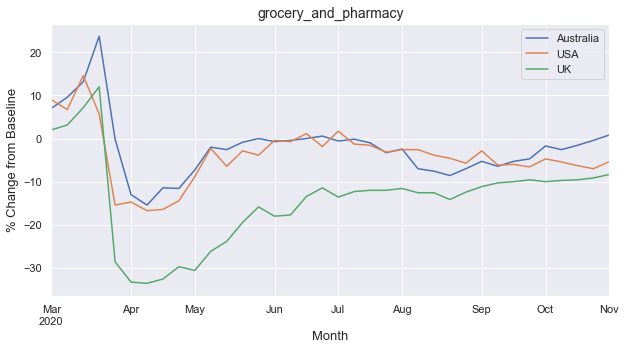

In [207]:
plotCountryData("grocery_and_pharmacy")

Grocery & pharmacies faced a similar trend to retail and recreation areas. Australia and USA have a very similar trend, but the UK had a significant drop in overall mobility and again fails to reach USA and Australia. 

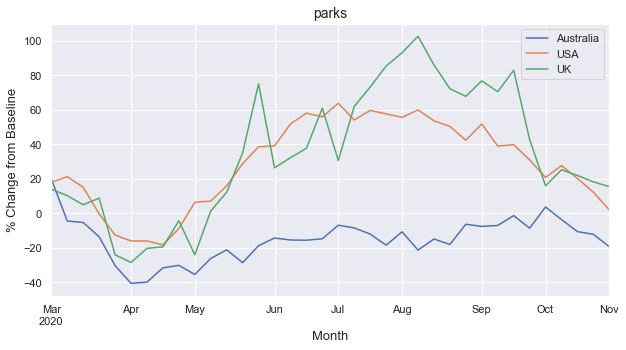

In [208]:
plotCountryData("parks")

As seem here, parks in USA and UK saw a rise in overall mobility, especially during the summer months. Comparatively, Australia failed to see the same rise as USA and UK. A reason for this could be the fact that Australia doesn't follow the same summer month as USA and UK. 

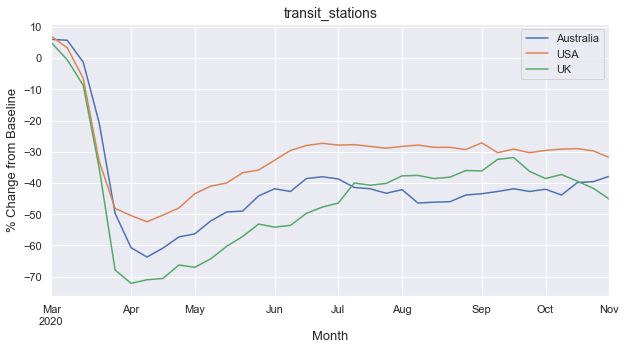

In [209]:
plotCountryData("transit_stations")

All three countries follow a similar trend for Transit Stations. USA has the lowest percentage change in overall mobility. The UK sees a dip towards the end of the graph, which could suggest that they may be increasing in cases or going into lockdown so less people are using public transport

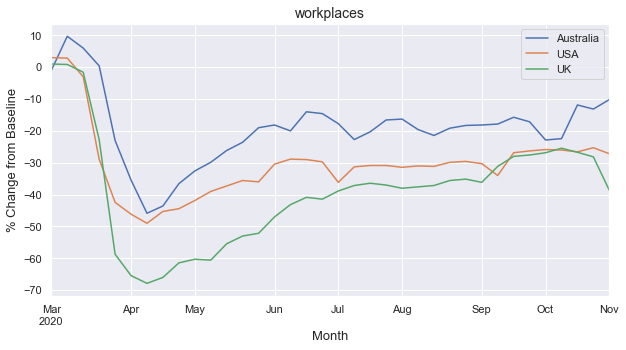

In [210]:
plotCountryData("workplaces")

Australia has the quickest recovery in terms of people getting back to workplaces compared to the other countries. The United Kingdom has the slowest recovery. This could be an indication of how well the virus was responded to by the different countries. Australia clearly did a good job to only have -10% mobility in workplaces towards the end

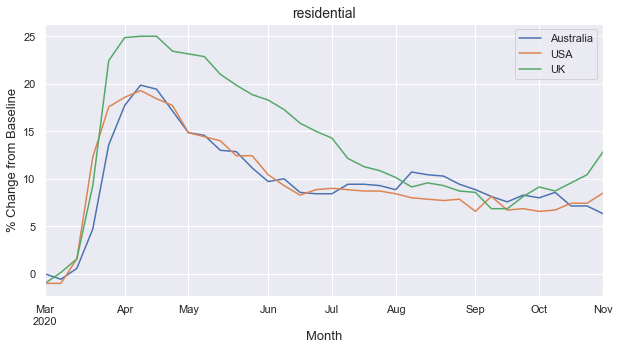

In [211]:
plotCountryData("residential")

We notice that Australia and USA follow a very similar trend for residential areas, whereas the UK has a much higher change in mobility in residential areas with a peak of +25%. This could suggest UK had stricter lockdown restrictions than the other countries. 

**Part C) Compare  and  contrast  how  the  series  for  the  different  location  categories  have changed  over  time  for  the  country.  To  what  extent  are  these  series  correlated with one another?**

**Part D) Suggest  explanations  for  any  differences  that  you  have  observed  between  the time series for the location categories.**

To complete this, I will firstly graph the time series by month. I will then make a bar chart to see how the monthly average compares with the other locations. Finally, with the use of a correlation heatmap, I will see what countries have the highest and lowest correlation. Each of these will be accompanied with explanations for any differences I observed

Text(0, 0.5, '%Change from Baseline')

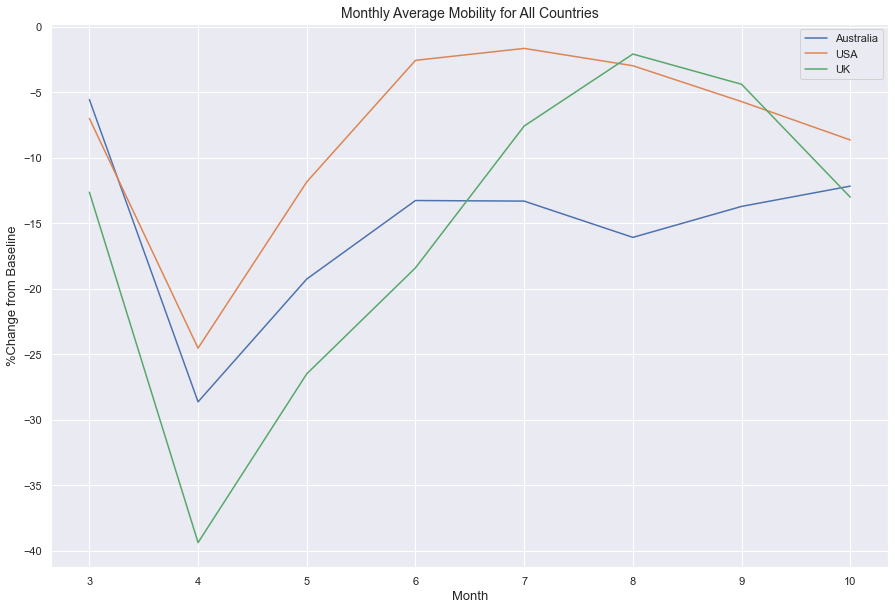

In [212]:
#grouping the mobility by month
a_month = a.groupby(a.index.month).mean()
x = a_month.plot(figsize=(15,10))
plt.title("Monthly Average Mobility for All Countries", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

As we can see, April had the biggest dips for all the countries. After this point they all begin to rise once again. The UK has the quickest increase out of the 3, but it also drops towards the end. Australia seems to be on an increasing trend whereas USA is on a downward trend.

Text(0, 0.5, '%Change from Baseline')

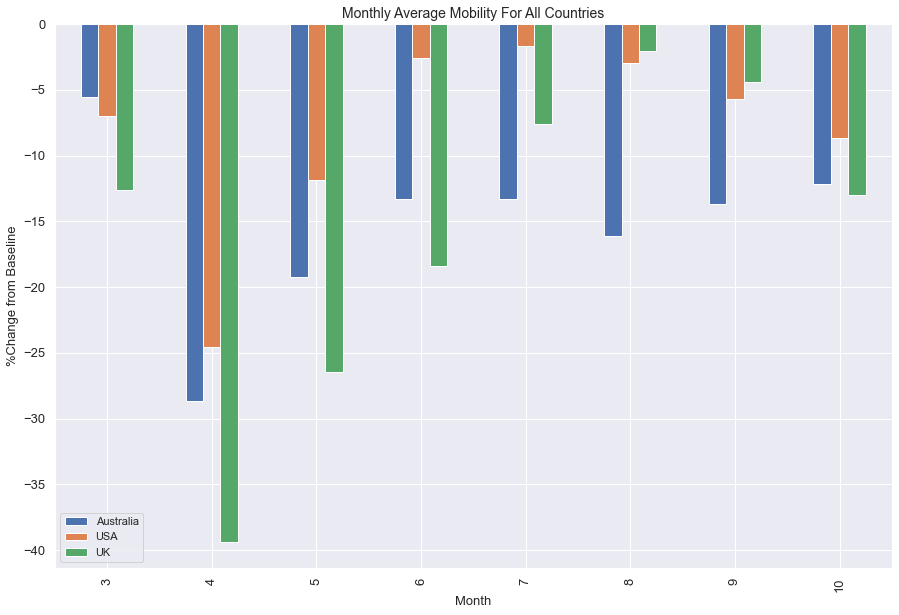

In [213]:
p = a_month.plot(kind='bar',figsize=(15, 10), fontsize=13, zorder=3)
plt.title("Monthly Average Mobility For All Countries", fontsize=14)
plt.xlabel("Month", fontsize = 13)
plt.ylabel("%Change from Baseline", fontsize = 13)

When we plot the monthly figures on a bar chat, it makes it quite clear to see the percentage changes over the months for all countries:

In March, the overall average mobility is ranked as such from highest to lowest:
>- Australia
>- USA
>- UK
>- A potential reason for this could be a quicker response in terms of lockdown from the UK. As well as this, with Australia being an Island much further away, it is possible it took slightly longer for the virus to reach there.

In April, the overall average mobility is ranked as such from highest to lowest:
>- USA
>- Australia
>- UK 
>- The cases in Australia must be increasing at this point which would explain the decrease in overall mobility of nearly 5 times the previous month. UK and USA also decrease overall mobility by over 3 times. This would prove that this period was the worst for all countries. 

In May, the overall average mobility is ranked as such from highest to lowest:
>- USA
>- Australia
>- UK 
>- USA nearly doubles it's overall mobility this month. Neither of the other countries face an increase of this rate. This could suggest that the country opened up again for business sooner than the other countries.

In June, the overall average mobility is ranked as such from highest to lowest:
>- USA
>- Australia
>- UK 
>- The USA continues to increase overall mobility at an alarming rate. Australia and UK are growing at a more gradual rate, which could suggest that they are phasing out of the lockdown. 

In July, the overall average mobility is ranked as such from highest to lowest:
>- USA
>- UK
>- Australia 
>- July sees the UK double it's overall mobility. A reason for this could be the peak of summer with schools and colleges off, so people may be spending time outside more. USA gets close to the baseline and Australia remains the same as the previous month.  

In August, the overall average mobility is ranked as such from highest to lowest:
>- UK
>- USA
>- Australia
>- The UK overtakes USA in overall mobility in August. This is quite surprising but it could suggest that the UK is open with few restrictions. The USA and Australia decreased in mobility slightly, this could be due to an increase in cases in their countries.

In September, the overall average mobility is ranked as such from highest to lowest:
>- UK
>- USA
>- Australia
>- The UK and USA decrease their overall mobility but Australia seems to increase slightly. There may have been additional restrictions put in place in Australia the previous month and now the restrictions aren't as strict, which may have led to this increase. 

In October, the overall average mobility is ranked as such from highest to lowest:
>- USA
>- Australia
>- UK
>- The rapid decrease in mobility in the UK which led to it drop to last place could be due to additional restrictions put in place by the government. USA also decreases it's mobility, however Australia increases. A potential reason for this could be a low amount of cases

Text(0.5, 1.0, 'Correlation Heatmap of countries')

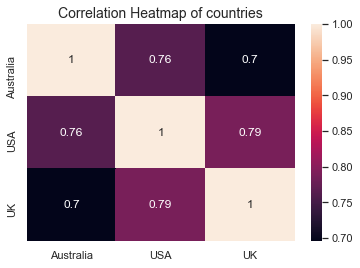

In [214]:
#heatmap of counties
heatmap = sns.heatmap(a.corr(), vmax=1, annot=True)
plt.title("Correlation Heatmap of countries", fontsize = 14)

I created a heatmap which displays the correlation between different countries. Any correlation that equals to 1 is comparing itself, so we will look for the next closest number. 

- Highest Correlation is between UK and USA.
- Lowest Correlation is between UK and Australia.

Text(0.5, 1.0, 'USA vs UK')

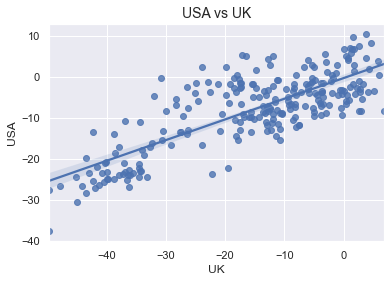

In [215]:
#regplot of countries
pl  = sns.regplot(x="UK", y="USA", data=a);
plt.title("USA vs UK", fontsize = 14)

Text(0, 0.5, '% change')

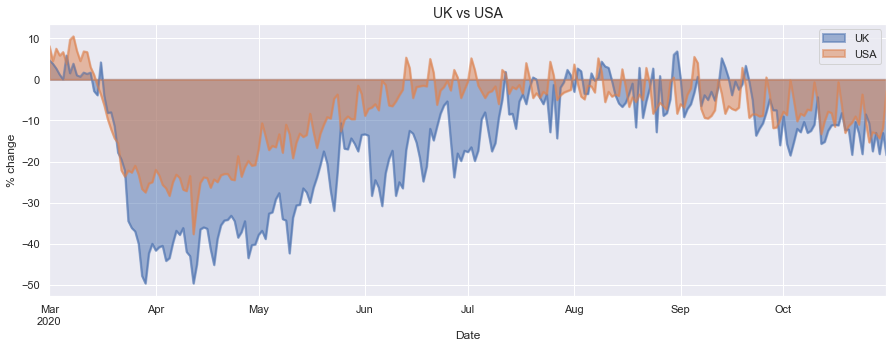

In [216]:
#plotting countries against each other with high correlation
uk_usa = a.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["UK","USA"])
plt.title("UK vs USA", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

Despite having multiple outliers, USA and UK have a scatter plot that resembles a direct correlation. The shape of the graphs are also similar. This makes sense due to the fact that a lot of mobility increases and decreases may also be due to seasonal changes which is different in America

Text(0.5, 1.0, 'UK vs Australia')

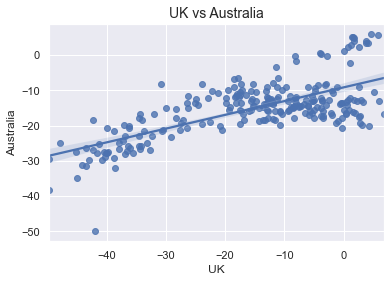

In [217]:
#regplot of countries
pl1  = sns.regplot(x="UK", y="Australia", data=a);
plt.title("UK vs Australia", fontsize = 14)

Text(0, 0.5, '% change')

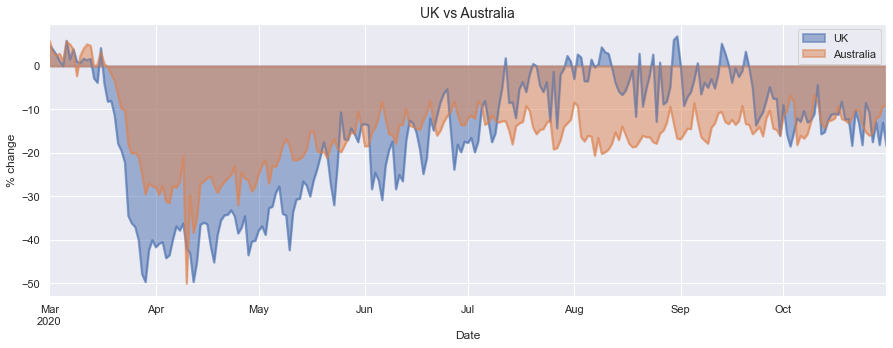

In [218]:
#plotting countries against each other with lowest correlation
uk_aus = a.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["UK","Australia"])
plt.title("UK vs Australia", fontsize = 14)
plt.xlabel("Date")
plt.ylabel("% change")

As we can see, the slope of the line is closer to having no correlation than the slope of USA vs UK. A reason for this could be due to the quick changing nature of UK's mobility. At one stage, it's the furthest away from the baseline, and in a few months it overtakes Australia. This is then followed by another decline. Whereas Australia seemed to stabilise at an average of around -15% and it maintains that consistently. The trend described here can be seen on the graph

**Concluding Remarks for All 3 Countries**

**Australia:** It seems to me that Australia has come the closest out of the three countries to a period of stability. Despite still being under the baseline for overall mobility, they are consistent. This suggests that the public is adhering to rules and the cases may be low as a result. The economy of the country has definitely been affected due to the decrease in mobility around locations that drive business activity. However, once again the consistency allows businesses to remain open without the fear of having to suddenly close and attempt to recover soon after. 

Another reason Australia may have performed better than the other countries could be due to it's geographical location. Although we didn't see huge changes in correlation, the seasons being different may have played into their favour. For example, during the summer months in USA and UK, Australia would have been in winter. Meaning potentially less people are going outside.

**United States of America:** The United States of America had the highest average overall mobility out of the three countries. They had both the highest maximum overall mobility and the lowest minimum overall mobility, as well as the lowest overall mean. This suggests that the United States had minimal restrictions put in place or people did not adhere to them. 

The trend seems to be a decreasing trend in overall mobility for the United States. This could suggest that they are decreasing their mobility, perhaps due to the seasonal changes so less people are going outside. An interesting study to conduct would be to extend this analysis over the next few months to see if a change in government has any impact on the mobility.

**United Kingdom:** It's hard to predict a trend for the UK due to a highly irregular trend shown over the past few months. In my opinion, overall mobiility in the UK was highly affected by lockdown restrictions. This leads me to believe the UK had far stricter lockdown restrictions than the other countries. 

It seems to me that the United Kingdom suffered the most economically out of the three countries. This is due to the severe lack of mobility in Retail & Recreational and Grocery & Pharmacies compared to Australia and USA, and having the lowest mobility in Workplaces. It will be interesting to see if the UK can bounce back economically next year with further lockdowns. Similar to USA, I expect overall mobility to decrease due to the winter seasons which will prevent people from going out unless it's necessary. 